# Проект спринта №8. Исследовательский анализ данных рынка заведений общественного питания Москвы

**Автор:** Семин Андрей Геннадьевич

**Дата подготовки отчета:** 14.02.2025г.

## Цель:

Открытие заведения общественного питания в Москве.

### Описание проекта:

Для открытия заведения общественного питания в Москве инвесторы из фонда **`Shut Up and Take My Money`** хотели бы провести исследование данных о различных заведения Москвы, собранных на основе данных из сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.

### Задачи:

1. Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.
2. Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.
3. Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.
4. Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.
5. Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?
6. Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.
7. Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.
8. Изучите вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.

### Описание данных

Файл, расположенный по адресу `https://code.s3.yandex.net/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - 0 — заведение не является сетевым;
  - 1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл, расположенный по адресу `https://code.s3.yandex.net/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»; «Цена чашки капучино: 130–220 ₽»; «Цена бокала пива: 400–600 ₽». и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Содержание проекта:

* [1. Загрузка данных и знакомтсво с ними](#1_charter)
* [2. Предобработка данных](#2_charter)
* [3. Исследовательский анализ данных](#3_charter)
* [4. Итоговый выво и рекомендации](#4_charter)


<a class="anchor" id="1_charter"></a> 
## 1. Загрузка данных и знакомство с ними

### 1.1. Загрузка данных и знакомство с ними

In [1]:
# Для начало работы необхоимо установить пакет phik, который необходим для расчета корреляции 
# и поиска зависимостей в данных
!pip install phik

In [2]:
# Подключаем библиотеку pandas, необходимую для работы с датафреймами
import pandas as pd

# Подключаем библиотеку matplotlib.pyplot и seaborn для создания визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Импортируем библиотеку phik_matrix из пакета phik для расчета коэффицентов корреляции
from phik import phik_matrix

Первостепенно создадим 2 датафрейма из csv-файлов


In [3]:
# Создаем два датафрейма: 
# resr_info - информация о заведениях;
# rest_price - информация о среднем чеке в заведениях.
rest_info = pd.read_csv('rest_info.csv')
rest_price = pd.read_csv('rest_price.csv')

In [4]:
# Сохраним информация о первоначальном количестве записей в датафреймах
rest_info_len = rest_info.shape[0]
rest_price_len = rest_price.shape[0]

Для начала работы с данными необходимо провести первончальное знакомство с ними с помощью методов **`info()`** и **`head()`**.

In [5]:
# Сначала посмотрим на данные датафрейма rest_info
display(rest_info.head(10))
rest_info.info()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN
6,96ebceb1a09e4e3191133b9fe0379a64,Огни города,"бар,паб","Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,пн 15:00–04:00; вт-вс 15:00–05:00,4.4,0,45.0
7,0243288b78024af090b8e947842c969c,Mr. Уголёк,быстрое питание,"Москва, Клязьминская улица, 9, стр. 3",Северный административный округ,"пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...",4.7,0,45.0
8,36aeb0ffa69c48fdb0021549520deb10,Donna Maria,ресторан,"Москва, Дмитровское шоссе, 107, корп. 4",Северный административный округ,"ежедневно, 10:00–22:00",4.8,0,79.0
9,487167877eb04288bc90d4fa80646fc2,Готика,кафе,"Москва, Ангарская улица, 39",Северный административный округ,"ежедневно, 12:00–00:00",4.3,0,65.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


При первичном ознакомлении с данными получена следующая информация:
- Размер датафрейма составляет 9 столбцов и 8406 строк;
- Название столбцов состоят из односоставных слов и удобны для дальнейшей работы (переименование столбов не потребуется);
- В данных присутствуют следующие типы: `float64` - 2 значения, `int64` - 1 значение, `object` - 6 значений;
- В данных присутсвуют пропуски значений в столбцах `hours` - часы работы заведения, `seats` - количество посадочных мест (требуется отдельное изучение доли и выбора метода обработки пропусков).

***Общий вывод по качеству данных датафрейма rest_info:***  в данных присутсвуют пропуски, что требует их отдельной обработки, некоторые данных (например: `chain` - значение-индикатор о форме заведения (сетевое или несетевое) представлено типом данных `int64`) занимают много места в памяти и требует оптимизации, информация о часах работы заведения представлена в формате `object`, что не дает применять методы для работы даты и времени, в зависимости от задач возможно потребуется создание новых столбцов для значений-индикаторов или временных диапозонов.

In [6]:
# Теперь изучим датафрейм rest_price
display(rest_price.head(10))
rest_price.info()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


При первичном ознакомлении с данными получена следующая информация:
- Размер датафрейма составляет 5 столбцов и 4058 строк;
- Название столбцов состоят из односоставных слов или конструкций записаны в стиле snake_case и удобны для дальнейшей работы (переименование столбов не потребуется);
- В данных присутствуют следующие типы: `float64` - 2 значения, `object` - 3 значений;
- В данных присутсвуют пропуски значений в столбцах `price` - категория цен в заведении, `avg_bill` - информация о среднем чеке, `middle_avg_bill` - среднее значение (медиана) полученная из предыдущего столбца при соблюденных условиях заполнения, `middle_coffee_cup` - среднее значение (медиана) из столбца `avg_bill` при соблюдении условий заполнения.

***Общий вывод по качеству данных датафрейма rest_price:*** в данных присутсвуют пропуски, что требует их отдельной обработки, некоторые данных (например: `middle_avg_bill` и `middle_coffee_cup` - числовое значение среднего чека (медиана среднего чека) представлено типом данных `float64`) занимают много места в памяти и требует оптимизации, количество записией в датафрейме значительно меньше чем в предыдущем (учитывая формат данных, их описание, а также наличие уникального идентификатора можно сделать следующие предположения: не у всех заведений есть информация о ценах; возможно в первом датафрейме присутствует большое количество дубликатов; в сетевых заведениях средний чек и информация о категории цен может быть одинакова).

На основе первичного знакомства с данными и полученных выводов проверим сформированные ранее предположения о различиях датафреймов по количеству записей и проверим количество уникальных значений в них.

In [7]:
# Узнаем количество уникальных записей по полю id в датафреймах
display('Количество уникальных значений в датафрейме rest_info:')
display(rest_info['id'].nunique())
display('Количество уникальных значений в датафрейме rest_price:')
display(rest_price['id'].nunique())

'Количество уникальных значений в датафрейме rest_info:'

8406

'Количество уникальных значений в датафрейме rest_price:'

4058

Количество уникальных значений в датафреймах совпадает с количеством записей, что говорит о том, что все представленные данные уникальны и повторений по `id` в данных не обнаружено. Предположение о большом количестве дубликатов пока что отпадает, однако следует проверить данные на наличие явных и неявных дубликатов также по другим полям. Учитывая, что количество уникальных записей по полю `id` в первом датафрейме равно общему количеству значений, можно сделать вывод о том, что каждое заведение внезависимости от формы (сетевое/несетевое) имеет уникальный идентификатор. Таким образом средний чек в различных заведениях (даже сетевых) формируется отдельно для каждого заведения.

In [8]:
# Проверим количество и долю пропущенных значений для всех полей в датафреймах
display('Количество пропусков в датафрейме rest_info:')
display(rest_info.isna().sum())
display('Доля пропусков в датафрейме rest_info:')
display(rest_info.isna().sum()  / rest_info_len *100)

display('Количество пропусков в датафрейме rest_price:')
display(rest_price.isna().sum())
display('Доля пропусков в датафрейме rest_price:')
display(rest_price.isna().sum()  / rest_price_len *100)

'Количество пропусков в датафрейме rest_info:'

id             0
name           0
category       0
address        0
district       0
hours        536
rating         0
chain          0
seats       3611
dtype: int64

'Доля пропусков в датафрейме rest_info:'

id           0.000000
name         0.000000
category     0.000000
address      0.000000
district     0.000000
hours        6.376398
rating       0.000000
chain        0.000000
seats       42.957411
dtype: float64

'Количество пропусков в датафрейме rest_price:'

id                      0
price                 743
avg_bill              242
middle_avg_bill       909
middle_coffee_cup    3523
dtype: int64

'Доля пропусков в датафрейме rest_price:'

id                    0.000000
price                18.309512
avg_bill              5.963529
middle_avg_bill      22.400197
middle_coffee_cup    86.816166
dtype: float64

В ходе проверки количества пропусков получили следующую информацию:
- в датафрейме rest_info:
  - количество пропусков в столбце `hours` составляет 536 (6,38%) записей;
  - количество пропусков в столбце `seats` составляет 3611 (42,96%) записей;
- в датафрейме rest_price:
  - количество пропусков в столбце `price` составляет 743 (18,31%) записи;
  - количество пропусков в столбце `avg_bill` составяет 242 (5,96%) записи;
  - количество пропусков в столбце `middle_avg_bil` составляет 909 (22,4%) записей;
  - количество пропусков в столбце `middle_coffee_cup` составляет 3523 (86,82%) записи.

***Общий вывод по пропуска в данных:*** в данных присутствуют пропуски, при том доля пропусков в разных столбцах и датафреймах различна, о причинах их появления и способах их обработки будет сказано в дальнейшем (раздел 2, пораздел 2).

### 1.2. Объединение данных в единый датафрейм

Для дальнейшей работы с данными и проведения исследовательного анализа данных необходимо совершить объединение двух датафреймов в один. Сделаем это с помощью метода `merge()`. Исходя из поставленных задач от заказчика следует провести объединение данных по столбцу `id`, при этом сохраним все значения из датафрейма rest_info используя значение `left` для параметра `how`. Это позволит сохранить всю информацию о существующих заведениях.

In [9]:
# Объединим датафреймы rest_info и rest_price 
rest_df = rest_info.merge(rest_price, how = 'left', on = 'id')
display(rest_df.head())
rest_df.info()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


В результате был получен единый датафрейм rest_df, размер котрого составил 13 столбцов и 8406 строк.

### Промежуточный вывод по разделу:

В ходе первичного знакомства с данными проанализировано содержимое двух датафреймов rest_info и rest_price. Название столбцов удовлетворительно для дальнешей работы. Данные содержат пропуски, при этом количество данных в датафреймах различно, что привело к тому, что многие заведения не имеют информации о среднем чеке и категории чека. В большинстве случаев типы данных при загрузке датафреймов определены верно, однако требуют дополнительной оптимизации и создания дополнительных полей для работы с датой (значение-индикаторы или дата, в зависимости от поставленных задач).

<a class="anchor" id="2_charter"></a> 
## 2. Предобработка данных

### 2.1. Изучение типов данных и их оптимизация

Проверим типы данных в созданном едином датафрейме и оценим какие данные могут быть оптимиизированы.

In [10]:
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Датафрейм содержит 13 столбцов данных:
- 8 столбцов типа `object`: `id`, `name`, `category`, `address`, `district`, `hours`, `price`, `avg_bill` - в перечисленных данных столбцы `hours` и `avg_bill` - могут оказаться проблемными по причине представления данных (в первом случае данные о времени работы представлены полноценным графиком, который трудно анализировать и ресурсно затратно приводить к единообразию, во втором случае информацию о среднем чеке хранится в формате строки с различными приставками, по которым вероятнее всего происходило заполнение других столбцов датафрейма);
- 4 столбца типа `float64`: `rating`, `seats`, `middle_avg_bill`, `middle_coffee_cup` - данные в столбце `rating` - имеют максимальное значение 5.0 (по условию системы оценивания), поэтому есть возможность оптимизации типа данных; в столбце `seats` указано количество посадочных мест, которые не могут быть дробным число, однако в нем присутствуют пропуски, поэтому тип данных невозможно изменить не отработав пропуски; наряду со столбцом seats, столбцы `middle_avg_bill` и `middle_coffe_cup` также содержат пропуски из-за чего изменение типа данных на данном этапе невозможно;
- 1 столбец типа `int64`: `chain` - значение-индикатор о формате заведения, которое может содержат значения 0 или 1, тем самым указанный тип данных занимает слишком много места для хранения и может быть оптимизирован.

In [11]:
# Преобразуем тип данных в стобце rating
rest_df['rating'] = pd.to_numeric(rest_df['rating'], downcast = 'float')

# Преобразуем тип данных в столбце chain
rest_df['chain'] = pd.to_numeric(rest_df['chain'], downcast = 'integer')

In [12]:
# Выведем обновленную информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float32(1), float64(3), int8(1), object(8)
memory usage: 829.1+ KB


Типы данных в столцах `rating` и `chain` были изменены на `float32` и `int8` соответственно, которые занимают меньше места. Тем самым получилось уменьшить объем датафрейма приблизительно на 90 KB.

### 2.2. Проверка пропусков в данных и их заполнение

Перед началом обработки пропусков еще раз взглянем на долю пропусков в объеме всех записей и предположим причины их появления, а также решим какой метод их обработки применим в дальнейшем.

In [13]:
rest_df.isna().sum() / rest_df.shape[0] * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Пропуски содержатся в 6 столбцах данных: `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.

В столбце `hours` процент содержаний пропусков небольшой (6.38%) от общего количества записей, такое количество значений могут быть удалены, что не сильно отразиться на результатах исследования. Однако, предвариетльно стоит проверить какие уникальные значения хранятся в столбце, возможно отсуствие значений может говорить о круглосуточном режиме работы.

Количество посадочных мест `seats` содержит 42.96% пропусков. Перед выбором метода стоит оценить как распределяются данные между категориями заведений. Возможно отсуствие значений в количестве мест может говорить о том, что посадочных мест нет и в заведении можно сделать заказ на вынос. 

Пропуски в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` обусловлены тем, что при объединении датафреймов были остановлены все записи о заведениях внезависимости о присутствии информации о показателях цен в них, информация  о них для заведений у которых пропущены эти значения в свою очередь могла быть незаполнена. При этом, меньше всего пропусков в столбце `avg_bill` - строка, включающая ценовой диапозон (начальные границы диапозона) среднего чека. Пропуски в `price`, `middle_avg_bill`, `middle_coffee_cup` могли появится из-за алгоритмов расчета и заполнения, по исходной информации о данных последние два поля заполнены на основе поля `avg_bill` при выполненнии определнных условий записи, поэтому в поле `price` пропуски могли появится по такой же причине. Однако, проверка данной гипотезы требует отдельного рассмотрения.

In [14]:
# Проверим уникальные значения в поле hours
rest_df['hours'].value_counts()

ежедневно, 10:00–22:00                         759
ежедневно, круглосуточно                       730
ежедневно, 11:00–23:00                         396
ежедневно, 10:00–23:00                         310
ежедневно, 12:00–00:00                         254
                                              ... 
пн,вс 18:00–22:30                                1
ежедневно, 07:00–23:00, перерыв 11:00–12:00      1
ежедневно, 09:00–23:00, перерыв 12:00–12:15      1
пн-пт 15:00–01:00; сб,вс 13:00–23:00             1
пн-чт 09:00–16:00; пт 09:00–15:30                1
Name: hours, Length: 1307, dtype: int64

Наше предположение о том, что пропуски могут связаны с тем, что заведение работает круглосуточно пока что не подтвердилось и требует дополнительного анализа в разрезе различных показателей. Учитывая, что задачи поступаемые от заказчика не сильно связаны с графиком работы (только в отношении круглостуочных заведений), а также тип данных по этому полю, можно заполнить пропуски в данных значением-индикатором "Не указано".

In [15]:
# Заполним пропущенные значения в столбце hours значением-индикатором "Не указано"
rest_df['hours'] = rest_df['hours'].fillna('Не указано')

По столбцу `seats` количество пропусков составляет 42.96%, это почти половина значений. Заполнение данных можно провести по расчету среднего или медианного значения. Для начала проверим основные статистические показатели этого поля.

In [16]:
rest_df['seats'].describe()

count    4795.000000
mean      108.421689
std       122.833396
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Значение среднего (108.42) и медианы (75), а также среднеквадратичного отклонения (122.83) демонстрируют что распределение ассиметрично со смещением хвоста распределения влево. На это могут также повлиять выбросы в данных, о наличии которых можно понять по максимальному значению посадочных мест (1288). 

Таким образом, использование среднего значения для заполнения пропусков будет ошибочным решением, так как сильно исказит данные, так как среднее более подвержено влиянию выбросов. Значение медианы в данном случае более оптимально, однако, учитывая количество пропущенных значений, это также скажется на данных. Одним из решений может стать заполнение данных на основе расчета медианного значения при группировки сетевых заведений, но в таком случае значения для несетевых заведений будут пропущены и предсказть их в разы труднее. Для окончательного принятия решений стоит также оценить как пропуски распределяются в зависимости от типа заведения.

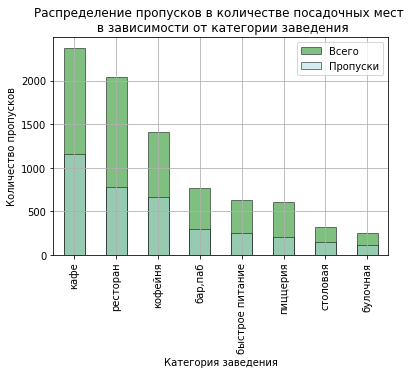

In [17]:
rest_df_copy = rest_df.copy()
rest_df_copy['seats'] = rest_df_copy['seats'].fillna(-1)
rest_df_copy = rest_df_copy[rest_df_copy['seats'] == -1]
rest_df.groupby('category')['id'].count().sort_values(ascending=False).plot (kind = 'bar',
                                                        alpha = 0.5, 
                                                       title = 'Распределение пропусков в количестве посадочных мест \n в зависимости от категории заведения',
                                                       color = 'green',
                                                       edgecolor = 'black',
                                                       xlabel = 'Категория заведения',
                                                       ylabel = 'Количество пропусков')
rest_df_copy.groupby('category')['seats'].count().sort_values(ascending=False).plot (kind = 'bar', alpha = 0.5,  
                                                       color = 'lightblue',
                                                       edgecolor = 'black',
                                                       xlabel = 'Категория заведения',
                                                       ylabel = 'Количество пропусков')


plt.legend(['Всего','Пропуски'])
plt.grid()
plt.show()


На основе полученных значений и визуализации можно сделать выводы о том, что распределение пропусков в зависимости от типа заведения происходит почти равномерно, явных пиков не видно. Однако количество пропущенных значений велико, поэтому заполнение пропущенных данных медианой приведет к искажению данных.

Количество пропусков `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` значительно больше чем число пропущенных значений в столбце `seats`, поэтому в отношении них заполнить пропуски также будет проблематично. Данные можно заполнить значениями-индикаторами, но все это может повлиять на расчет коэффициентов корреляции. Поэтому заполнеие пропусков значениями индикаторами проведем непосредственно перед расчетом коэффециентов по необходимости. 

### Промежуточный вывод о пропусках в данных:

В данных по определенным полям содержится большое количество пропусков. Количество пропусков по разным полям составляют от 6.38% до 93.64% от всех значений. Было принято решение заполнить пропуски в часах работы заведения значением-индикатором "Не указано", остальные пропуски остались  не заполнены так как их обработка может привести к искажению данных или помешать дальнейшей работе при анализе взаимосвязей. Пустые значения могут быть заполнены дальше при необходимости. При дальнейшем анализе данных, пустые значения будут отбрасываться в зависимости от реализуемого исследования.

### 2.3. Проверка явных и неявных дубликатов и их устранение

В ходе первичного знакомства с данными мы проверили количество уникальных значений, а как следствие отсутствие явных дубликатов по столбцам `id`. Теперь проведем проверку явных и неявных дубликатов по полям адрес и название заведения. Чаще всего именно в этих данных могут произойти опечатки. Для начала выведем уникальные адреса заведений и их количество.

In [18]:
# Количество уникальных адресов:
display(rest_df['address'].value_counts())
rest_df['address'].nunique()

Москва, проспект Вернадского, 86В       28
Москва, Усачёва улица, 26               26
Москва, площадь Киевского Вокзала, 2    20
Москва, Ярцевская улица, 19             20
Москва, Щёлковское шоссе, вл75          16
                                        ..
Москва, улица Красина, 9с1               1
Москва, Вишнёвая улица, 2/14             1
Москва, Бойцовая улица, 27, корп. 5      1
Москва, улица Зацепа, 26с1               1
Москва, 5-я Парковая улица, 42           1
Name: address, Length: 5753, dtype: int64

5753

В данных датафрейма содержится 5753 уникальных адреса, при этом форма записи адреса единая. На всякий случай стоит привести названия в единый регистр, на случай если при внесении адреса название улицы был перепутан регистр.

Проведем аналогичное действие с названиями заведений.


In [19]:
# Количество уникальных названий:
display(rest_df['name'].value_counts())
rest_df['name'].nunique()

Кафе                189
Шоколадница         120
Домино'с Пицца       76
Додо Пицца           74
One Price Coffee     71
                   ... 
Чайхана Омад          1
Чердак                1
Кафе на Пришвина      1
Батон                 1
Литл Осака бар        1
Name: name, Length: 5614, dtype: int64

5614

Количество уникальных названий составляет 5614. При этом в названиях присутсвуют как полноценные названия (например: Шоколадница и др.), которые являются сетевыми, так и просто название "кафе", которые вероятнее всего не относится к сетевым заведениям тем самым представляя дубликаты в названиях. 

На основе этого найдем количество явных дубликатов и после приведем все названия к нижнему регистру, чтобы избавиться от неявных дубликатов.

In [20]:
# Удаляем из датафрейма явные дубликаты и выводим количество удаленных записей
rest_df = rest_df.drop_duplicates(subset=['name', 'address'], keep = 'first')
print(f'Удалено: {rest_info_len - rest_df.shape[0]} записи.')
rest_df_len = rest_df.shape[0]

Удалено: 0 записи.


Количество удаленных записей в размере 0 говорит о том, что в данных небыло обнаружено явных дубликатов.

In [21]:
# Теперь приведем все значения к нижнему регистру
rest_df['name'] = rest_df['name'].str.lower()
rest_df['address'] = rest_df['address'].str.lower()

In [22]:
# Вновь удалим дубликаты
rest_df = rest_df.drop_duplicates(subset=['name', 'address'], keep = 'first')
print(f'Удалено: {rest_df_len - rest_df.shape[0]} записи.')
rest_df_len = rest_df.shape[0]

Удалено: 4 записи.


Всего после формализации данных было найдено удалено 4 дублирующие записи.

In [23]:
# Проверим датафрейм на наличие дубликатов после удаления
display(f'Количество явных дубликатов в данных: {rest_df.duplicated().sum()}')

'Количество явных дубликатов в данных: 0'

### 2.4. Создание новых полей для анализа

Для работы с графиком работы заведенний необходимо выделить заведения, которые работают ежедневно и круглосуточно. Ранее при изучении данных был замечены ряд значений в поле `hours`, которые содержали в данных слова `ежедневно` и `круглосуточно`. 

In [24]:
# Создадим новый столбец в датафрейме rest_df, в который внесем значения True или False.
rest_df['is_24_7'] = rest_df['hours'].str.contains('ежедневно, круглосуточно')

In [25]:
#Подсчитаем количество полученных и заполненых значений в поле is_24_7
rest_df['is_24_7'].sum()

730

In [26]:
# Проверим также количество записей, в котором встречается только слово круглосуточно
rest_df['hours'].str.contains('круглосуточно').sum()

772

В ходе подсчета количества строк, содержащих слово `круглосуточно` получилось большое число подходящих строк. Стоит проверить какие уникальные значения содержат это слово.

In [27]:
rest_df[rest_df['hours'].str.contains('круглосуточно')]['hours'].value_counts()


ежедневно, круглосуточно                                                                       730
пн-чт 08:00–23:00; пт 08:00–00:00; сб круглосуточно; вс 00:00–23:00                              3
пн-чт 07:30–23:00; пт 07:30–00:00; сб круглосуточно; вс 00:00–23:00                              2
пн-чт 08:00–23:00; пт,сб круглосуточно; вс 08:00–23:00                                           2
пн-чт 10:00–00:00; пт-вс круглосуточно                                                           1
вт-вс круглосуточно                                                                              1
пн-чт 10:00–00:00; пт,сб круглосуточно; вс 10:00–00:00                                           1
пн-ср 08:00–00:00; чт-сб круглосуточно; вс 08:00–00:00                                           1
пн-чт 09:00–00:00; пт,сб круглосуточно; вс 09:00–00:00                                           1
пн,вт 10:00–00:00; ср-вс круглосуточно                                                           1
пн 10:00–0

На основе полученных данных заметно, что оставшиеся заведения в графике которых встречается слово круглосуточно работают не ежедневно или круглосуточны только в определенные дни.

<div class="alert alert-success">

**Артём:** 👍 Молодец, что делаешь проверку.

### Промежуточный вывод по разделу:

В ходе работы по предобработке данных были выполнены следующие этапы:
- Оптимизированы типы данных: заменены типы данных в двух полях, тем самым позволив уменьшить размер файла на 90 КВ;
- Проверены и отработаны пропуски в данных: заполнены пропуски в графике работы заведений (выбрано значение "Не указано"), остальные пропуски не заполнялись так как могут исказить данные в датафрейме;
- Устранены дубликаты в данных, их количество составило 4 записи;
- Добавлено новое поле-индикатор, в которых хранится информация о круглосуточном и ежедневном графике работы.

<a class="anchor" id="3_charter"></a> 
## 3. Исследовательский анализ данных

### 3.1. Какие категории заведени представлены в данных?

В данных были замечены различные категории заведений общественного питания: кафе, рестораны, бары и т.д. Для того, чтобы нагляднее представить количество объектов в Москве выведем общее количество данных и создади столбчатую диаграмму для их визуализации.

In [28]:
# Выведем количество упоминай значений по столбцу категория,
# так мы увидем количество заведений различных категорий
rest_df['category'].value_counts()

кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

В полученной информации можно заметить, что больше всег опредставлено завдеений с категорией **`кафе`**, меньше всего - **`булочных`**. 

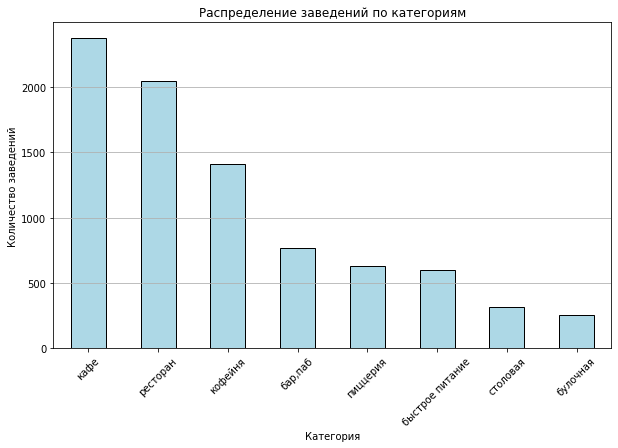

In [29]:
# Теперь для удобства восприятия информации визуализируем полученные данные
rest_df['category'].value_counts().plot(kind = 'bar', title = 'Распределение заведений по категориям', 
                         ylabel = 'Количество заведений', xlabel = 'Категория',
                        figsize = (10,6),
                        color = 'lightblue', edgecolor = 'black', rot = 45)
plt.grid(axis = 'y')
plt.show()

В данных представлено 8 различных категорий: кафе, ресторан, кофейня, бар(паб), пицеерия, быстрое питание, столовая, булочная. Перечисленные категории выстроены в порядке убывания количества заведений в г. Москва. Самые популярные категории - кафе, рестораны. Суммарно они занимают почти половину всех представленных данных. Менее популярны кофейни. Количество записей о них составляет почти 1400. Остальные заведения менее популярны. Самым непопулярной категорией завдений являются столовые (315 заведений) и булочные (256 заведений).

### 3.2. Какие административные районы Москвы присутствуют в данных?

Для начала исследуем какие административные райны москвы представлены в данных. Для этого выведем список уникальных значений.


In [30]:
# Воспользуемся функцией unique() для отображения уникальных значений и nunique() для количества этих значений
display(rest_df['district'].unique())
rest_df['district'].nunique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

9

Всего в данных представлено 9 различных административных округов Москвы. Чаще всего много заведений общественного питания расположены в центральных районах городов, поэтому этот окргу стоит изучить подробнее.

In [31]:
# Для начала исследуем количество заведений в каждом округе Москвы
rest_df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Из полученного среза заметно что больше всего заведений как раз находятся в центральном районе Москвы. Для наглядности визуализируем эту информацию.

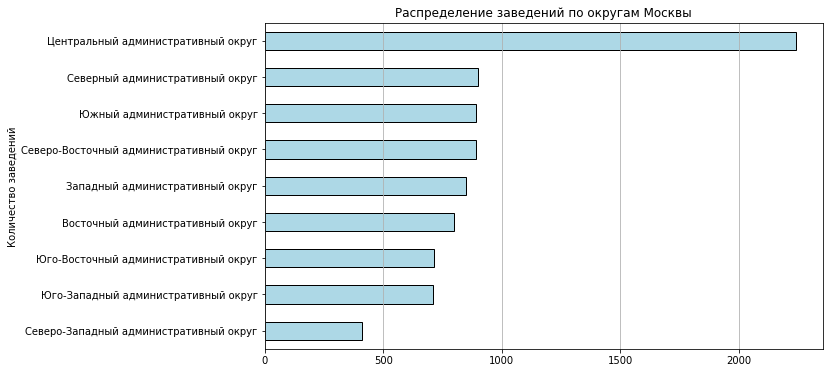

In [32]:
# Также воспользуемся столбчатой диаграммой для визуализации данных
rest_df['district'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title = 'Распределение заведений по округам Москвы',
                                        xlabel = 'Количество заведений', ylabel = 'Округ Москвы',
                                        figsize = (10,6),
                                        color = 'lightblue', edgecolor = 'black')
plt.grid(axis = 'x')
plt.show()

Больше всего заведений общественного питания представлено в Центральном административном окргуе Москвы - 2242 заведения. Меньше всего заведений представлено в Северо-Западном административном окргуе Москвы - 409 заведений. В остальных административных округах количество заведений варируется от 709 до 898 заведений.

Теперь рассмотрим распределение заведений по категориям в Центральном административном округе Москвы.

In [33]:
# Выведем количество заведений различных категорий в центральном административном округе
rest_df[rest_df['district'] == 'Центральный административный округ'].groupby('category')['id'].count() 

category
бар,паб            364
булочная            50
быстрое питание     87
кафе               464
кофейня            428
пиццерия           113
ресторан           670
столовая            66
Name: id, dtype: int64

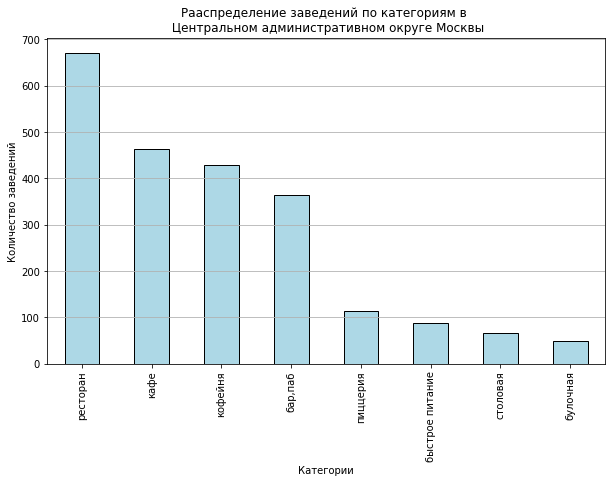

In [34]:
# Визуализируем полученные данные
rest_df[rest_df['district'] == 'Центральный административный округ'].groupby('category')['id'].count().sort_values(ascending=False).plot( kind = 'bar',
                                                                                                            title = 'Рааспределение заведений по категориям в \n Центральном административном округе Москвы',
                                                                                                            ylabel = 'Количество заведений',
                                                                                                            xlabel = 'Категории',
                                                                                                            figsize = (10,6),
                                                                                                            color = 'lightblue', edgecolor = 'black')
plt.grid(axis = 'y')
plt.show()

В Центральном административном округе Москвы самым поплуряной категорией заведений являются **`рестораны`** - 670 заведений. Также к популярным можно отнести кафе (464 заведения), кофейни (428 заведений), бары/пабы (364 заведения). Менее популярны - булочные и столовые и заведения быстрого питания (меньше 100 заведения в каждой категории).

### 3.3. Какие заведений больше - сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

Теперь изучим распределение сетевых и несетевых заведений. Для начала рассмотрим каких заведений больше.

In [35]:
# Изучим количество сетевых и несетевых заведений 0 - несетевое, 1 - сетевое
rest_df['chain'].value_counts()

0    5199
1    3203
Name: chain, dtype: int64

Суммарно получена информация о 8402 заведениях Москвы (с учетом устраненых дубликатов). Из них: 
- 5199 - несетевые заведения;
- 3203 - сетевое заведения.

In [36]:
# Узнаем сколько это составляет в процентах
rest_df['chain'].value_counts(normalize = True) * 100

0    61.878124
1    38.121876
Name: chain, dtype: float64

В процентном соотношении 62% - несетевых заведений, 38 - сетевых.

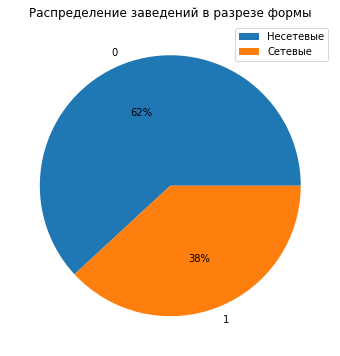

In [37]:
# Представим иинформация выше на графиках
rest_df['chain'].value_counts().plot(kind = 'pie', title = 'Распределение заведений в разрезе формы',
                                     figsize = (10,6), autopct='%1.0f%%', label = '')

plt.legend(['Несетевые', 'Сетевые'])
plt.show()

<div class="alert alert-success">

**Артём:** ✔️Ё Лучше сделать круговую диаграмму поскольку всего два значения, и их сумма составляет 100%.
    
</div>

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
 #### Итеррация 2. В практикуме эта тема не затрагивалась, поэтому решил не использовать!) Перестроил)

Таким образом, несетевых заведений больше чем несетевых. Теперь рассмотрим какие категории заведения чаще являются сетевыми. Для этого рассмотрим долю сетевых заведений в разрезе по категориям в отношении всех заведений в категории и сравним их значения.

In [38]:
# Так как в информация о форме представлена в булевых данных, то можем воспользоваться функцией mean()
rest_df.groupby('category')['chain'].mean()

category
бар,паб            0.219895
булочная           0.613281
быстрое питание    0.384743
кафе               0.327862
кофейня            0.509554
пиццерия           0.521327
ресторан           0.357003
столовая           0.279365
Name: chain, dtype: float64

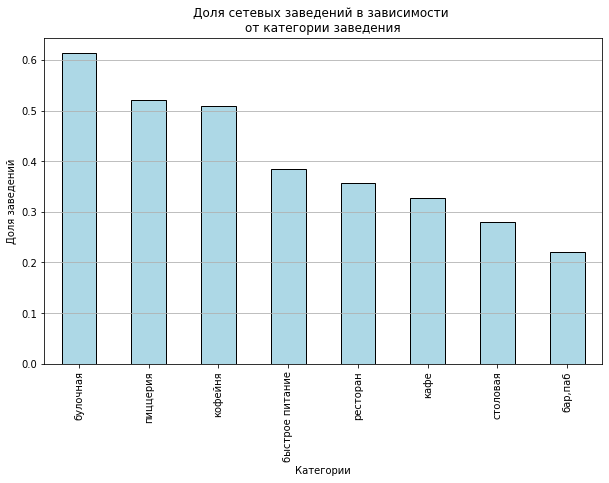

In [39]:
# Теперь визуализируем полученную информацию
rest_df.groupby('category')['chain'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Доля сетевых заведений в зависимости \nот категории заведения',
                                                 xlabel = 'Категории', ylabel = 'Доля заведений',
                                                 figsize = (10,6),
                                                 color = 'lightblue', edgecolor = 'black')
plt.grid(axis='y')
plt.show()

При рассмотрении доли сетевых заведений заметно, что чаще всего сетевые заведения открываются в булочных, пиццериях и кофейнях. Меньше всего в бара (пабах). Доля сетевых заведений демонстрирует насколько уникален рынок заведений в различных категориях. Чем меньше доля, тем более уникален рынок в категориях.
Доля для баров (пабов) составляет 0.21 (21%), булочные - 0.61 (61%), пиццерии - 0.52 (52%), кофейни - 0.51 (51%).


### 3.4. Встречаются ли в данных аномальные значения или выбросы?

Для исследования аномальных значений и выбросов снова рассмотрим какие данные у нас есть, а также вывдем общие статические данные по числовым столбцам.

In [40]:
# Выведем общую информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(1), float64(3), int8(1), object(8)
memory usage: 836.9+ KB


In [41]:
# Выведем информацию о статических показателях числовых полей
rest_df.describe()

,rating,chain,seats,middle_avg_bill,middle_coffee_cup
count,8402.000000,8402.000000,4792.000000,3149.000000,535.000000
mean,4.230016,0.381219,108.361436,958.053668,174.721495
std,0.470320,0.485715,122.841130,1009.732845,88.951103
min,1.000000,0.000000,0.000000,0.000000,60.000000
25%,4.100000,0.000000,40.000000,375.000000,124.500000
50%,4.300000,0.000000,75.000000,750.000000,169.000000
75%,4.400000,1.000000,140.000000,1250.000000,225.000000
max,5.000000,1.000000,1288.000000,35000.000000,1568.000000


Из полученного среза можем не обращать внимания на столбец `chain`, так как в это столбце представлены значения-индикаторы о форме заведения. 

Теперь изучим по отдельности отдельные столбцы:
- **`rating`**: поле содержит информацию о ретинге заведения; среднее и медиана почти сопадают; по минимальному и максимальному значению заметно, что значения находятся в пределах установленной системы оценивания; выбросов и аномалий нет; значение среднеквадратичного отклоенения небольшое, что демонстриует небольшой разброс вариабильности данных.
- **`seats`**: поле содержит информацию о количестве посадочных мест в заведениях; всего представлена информация о 4792 заведениях; среднее значение отличается от медианного что говорит о наличии выбросов и/или аномальных значений; также об этом говорит максимальное значение 1288, которое выглядит нереальным; среднеквадратичное также представлено большим значеним, что говорит о большой вариабельноти данных и разбросе; для дальнейшего анализа стоит избавиться от выбросов.
- **`middle_avg_bill`**: поле содержит информацию о среднем чеке; данные представлены по 3149 заведениям, что нужно учитывать при дальнейшем анализе; значение среднего и медианы сильно отличаются, что говорит о наличии левого хвоста в распределении данных и возможных аномалийи и выбросах; максимальное значение очень выбивается и похоже на аномалию; среднеквалратичное отклонение также велико, что доказывает наличие большой вариабелности и разброса, а также аномалий; для дальнейшего анализа стоит избавиться от выбросов.
- **`middle_coffe_cup`**: поле содержит информацию о средней цене чаашки кофе; данные представлены по 535 заведениям, что нужно учитывать при дальнейшем анализе; значение среднего и медианы почти равны, что говорит о нормальном распределении данных; максимальное значение очень выбивается и похоже на аномалию; среднеквалратичное отклонение большое по сравнению со значением среднего и медианы, что доказывает наличие вариабелности и разброса, а также аномалий; для дальнейшего анализа стоит избавиться от выбросов.

Наличие выбросов и аномалий в количестве посадочных мест возможно из-за ошибок при внесении данных о заведениях. В свою очередь аномалии в среднем чеке могли возникнуть по причине разнового формата работы заведений (некоторые заведения могут требовать внесение депозита, из-за чего средний чек будет гарантировано не ниже определенных значений). Кроме того, нам неизвестен алгоритм расчета среднего чека, возможно процесс не автоматизирован и некоторые заведения самостоятельно расчитывают и вносят эту информацию, тем самым также не исключая возможность внесения ошибочного значения.

Для начала проанализируем количество посадочных мест в различных категориях заведений, первончально сформируем графики с учетом выбросов, а потом без них.

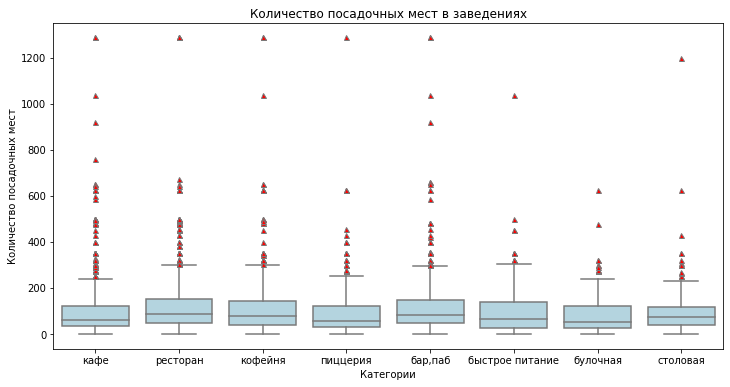

In [42]:
plt.figure(figsize = (12,6))
sns.boxplot(x='category', y = 'seats', data = rest_df, color = 'lightblue',
           flierprops = dict(markerfacecolor = 'red', marker = '^'))
plt.title('Количество посадочных мест в заведениях')
plt.xlabel('Категории')
plt.ylabel('Количество посадочных мест')
plt.show()

На основе полученной визуализации видно, что во всех значениях о количестве посадочных мест присутствуют аномальные значения и выбросы. Для того, чтобы избавиться от них воспользуемся дополнительным параметром `showfliers`.

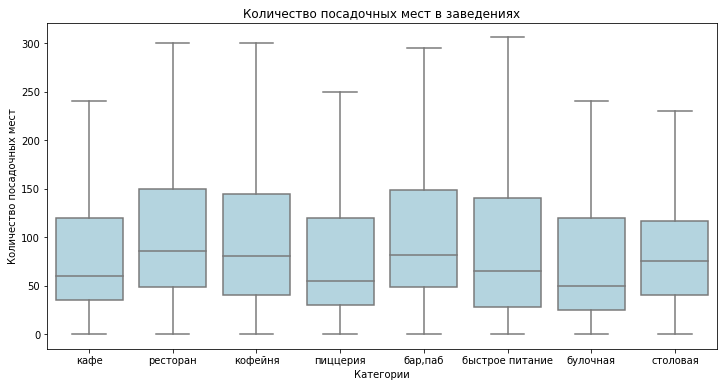

In [43]:
plt.figure(figsize = (12,6))
sns.boxplot(x='category', y = 'seats', data = rest_df, color = 'lightblue',
           showfliers = False)
plt.title('Количество посадочных мест в заведениях')
plt.xlabel('Категории')
plt.ylabel('Количество посадочных мест')
plt.show()

In [44]:
# Для удобства вывдем информацию о среднем и медиане в разбивке по каждой категории
pivot_rest = pd.pivot_table(rest_df, index = 'category', values = 'seats', aggfunc = ['mean', 'median'])
print(pivot_rest)
display(rest_df.groupby('category')['seats'].quantile(0.25))
display(rest_df.groupby('category')['seats'].quantile(0.75))

                       mean median
                      seats  seats
category                          
бар,паб          124.477516   82.0
булочная          89.385135   50.0
быстрое питание   98.891117   65.0
кафе              97.365653   60.0
кофейня          111.199734   80.0
пиццерия          94.496487   55.0
ресторан         121.892041   86.0
столовая          99.750000   75.5


category
бар,паб            48.0
булочная           25.0
быстрое питание    28.0
кафе               35.0
кофейня            40.0
пиццерия           30.0
ресторан           48.0
столовая           40.0
Name: seats, dtype: float64

category
бар,паб            148.5
булочная           120.0
быстрое питание    140.0
кафе               120.0
кофейня            144.0
пиццерия           120.0
ресторан           150.0
столовая           117.0
Name: seats, dtype: float64

Из графика видно, что самое большое количество посадочных мест в среднем расположено в ресторанах - 86, при этом разброс от 0 до 300 что влияет на значение среднего (121,9). При этом меньше всего в булочных - медиана 50 посадочных мест с разбросом от 0 до приблизительно 240 мест (среднее - 89). Меньше всего разброс (без учета выбросов) в столовых от 0 до 230, при этом среди других категорий разница между среднем и медианой столовые демонстриует наименьшение отлчиие.

Таким образом наиболее типичное количество посадочных мест в различных категориях варируется следующим образом:
- бар (паб) от 48 до 148 (медиана - 82, среднее - 124,5);
- булочаня от 25 до 120 (медиана - 50, среднее - 89,4);
- быстрое питание от 28 до 140 (медиана - 65, среднее - 98,9);
- кафе от 35 до 120 (медиана - 60, среднее - 97,4);
- кофейня от 40 до 144 (медиана - 80, среднее - 111,2);
- пиццерия от 30 до 120 (медиана - 55, среднее - 94,5);
- ресторан от 48 до 150 (медиана - 86, среднее - 122)
- столовая от 40 до 117 (медиана - 77,5, среднее - 99,8).

### 3.5. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Значение рейтинга заведения общественного питания может варироваться от 1 до 5 (где 1 - низкая оценка, 5 - высокая). Для анализа усредненного рейтинга сначал выведем средний рейтинг заведений в зависимости от категории заведения.

In [45]:
# Выведем информацию об усредненном рейтинге для различных категорий заведений
rest_df.groupby('category')['rating'].mean()

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.277282
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32

Усредненные значения рейтингов заведений приблизительно одинаковы и все выше 4 звезд.

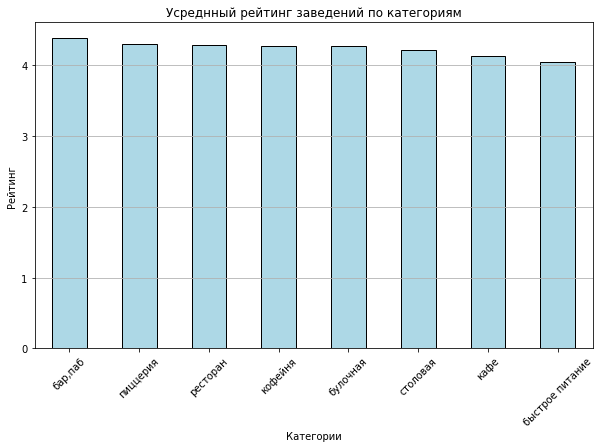

In [46]:
# Выведем информация о рейтинге в виде графиков
rest_df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Усреднный рейтинг заведений по категориям',
                                                  xlabel = 'Категории', ylabel = 'Рейтинг',
                                                  figsize = (10,6), 
                                                  color = 'lightblue', edgecolor = 'black',
                                                  rot = 45)
plt.grid (axis = 'y')
plt.show()

Усредненный рейтинг заведений во всех категориях выше 4, при этом выше всего рейтинг у баров (пабов) - 4.39, а хуже всего у заведений быстрого питания - 4.05. Второе и третье место в рейтинге занимают пиццерии и ресторны.

***P.S. Пьяный человек - лояльный клиент)))***

### 3.6. С какими данными показывают самую сильную корреляцию рейтинги заведений?

Для оценки корреляции воспользуемся методом `phik_matrix()`. Вначале проверим корреляцию по всему датафрейму, а потом отдельно выведем корреляцию по рейтингу.

In [47]:


# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest_df[['rating', 'category', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7']].phik_matrix()

# Выводим результаты
display('Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:')
display(correlation_matrix) 

interval columns not set, guessing: ['rating', 'chain', 'seats', 'middle_avg_bill']


'Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:'

,rating,category,district,chain,seats,middle_avg_bill,is_24_7
rating,1.000000,0.198739,0.189453,0.118857,0.000000,0.218416,0.161010
category,0.198739,1.000000,0.174584,0.266000,0.048923,0.053513,0.244815
district,0.189453,0.174584,1.000000,0.064473,0.352440,0.056558,0.076357
chain,0.118857,0.266000,0.064473,1.000000,0.056523,0.046206,0.043488
seats,0.000000,0.048923,0.352440,0.056523,1.000000,0.045217,0.043193
middle_avg_bill,0.218416,0.053513,0.056558,0.046206,0.045217,1.000000,0.046124
is_24_7,0.161010,0.244815,0.076357,0.043488,0.043193,0.046124,1.000000


В таком наборе данных сложно разобарться в силе корреляциионной связи между переменными. Для удобства рассмотрения необходимо визуализировать данные с помощью тепловой карты.

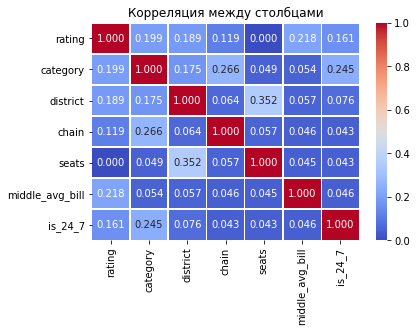

In [48]:
sns.heatmap(correlation_matrix, annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция между столбцами')
plt.show()

Тепловая карта демонстрирует все данные корреляции в формате графика, где в зависимости от величины корреляции ячейки с самой сильной корреляцией демонстриует крассный цвет, а с самой низкой - синий.

Теперь изучим корреляцию с данными только для рейтинга.

In [49]:
corr = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
# Выводим результаты
display('Корреляционная матрица с коэффициентом phi_k для поля rating датафрейма:')
display(corr) 

'Корреляционная матрица с коэффициентом phi_k для поля rating датафрейма:'

,rating
middle_avg_bill,0.218416
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


Повторим аналогичную процедуру и построим тепловую карту. 

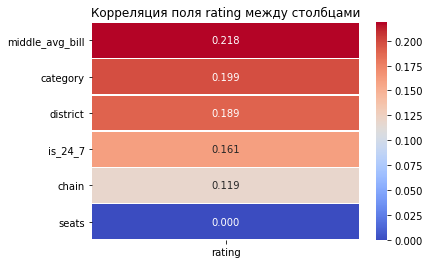

In [50]:
sns.heatmap(corr, annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция поля rating между столбцами')
plt.show()

По полученной тепловой карте и корреляционным показателям видно, что значения рейтинга никак не коррелируются с показателем количества посадочных (сила корреляции 0). Корреляция рейтинга с остальными полями отлична от нуля, однако уровень силы возможной связи между этими данными можно отнести к низкому. Самый большой показатель корреляции демонстрируют средний чек в заведения, его категория и район его расположения. Остальные данные связи отбросим, так как они не имеют весомой силы. Далее следует проверить эти данные.

Рассмотрим графики совметного распределения данных столбцов `rating` и `middle_avg_bill` для оценки зависимости двух переменных между собой.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(1), float64(3), int8(1), object(8)
memory usage: 1.1+ MB


None

<Figure size 1080x1080 with 0 Axes>

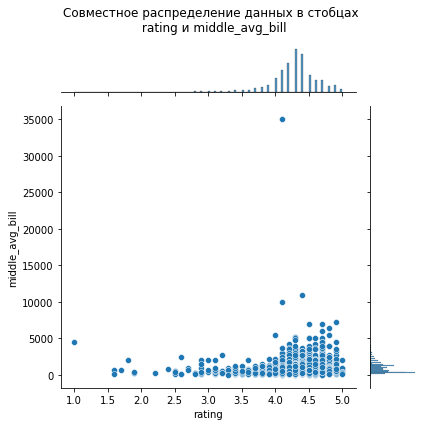

In [51]:
display(rest_df.info())
plt.figure (figsize = (15,15))
sns.jointplot(data=rest_df, y = 'middle_avg_bill', x = 'rating', kind = 'scatter')
plt.suptitle('Совместное распределение данных в стобцах \n rating и middle_avg_bill')
plt.tight_layout()
plt.show()

На основе графика трудно выдвинуть гипотезу и проанализировать связь. Чтобы исправить эту ситуацию стоит избавиться от выбросов. Создадим отдельный датафрейм, из которого буду исключены выбросы в цене среднего чека.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3146 entries, 1 to 8403
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3146 non-null   object 
 1   name               3146 non-null   object 
 2   category           3146 non-null   object 
 3   address            3146 non-null   object 
 4   district           3146 non-null   object 
 5   hours              3146 non-null   object 
 6   rating             3146 non-null   float32
 7   chain              3146 non-null   int8   
 8   seats              1988 non-null   float64
 9   price              2676 non-null   object 
 10  avg_bill           3146 non-null   object 
 11  middle_avg_bill    3146 non-null   float64
 12  middle_coffee_cup  0 non-null      float64
 13  is_24_7            3146 non-null   bool   
dtypes: bool(1), float32(1), float64(3), int8(1), object(8)
memory usage: 313.4+ KB


None

<Figure size 1080x1080 with 0 Axes>

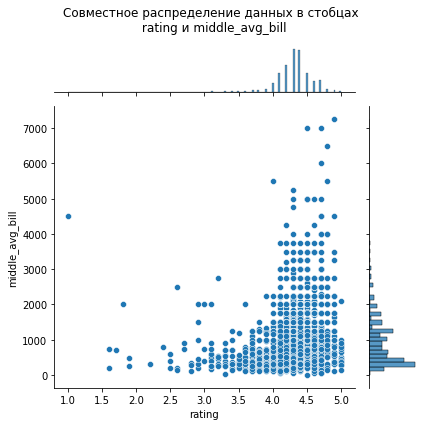

In [52]:
rest_df_copy = rest_df[rest_df['middle_avg_bill'] < 10000]
display(rest_df_copy.info())
plt.figure (figsize = (15,15))
sns.jointplot(data=rest_df_copy, y = 'middle_avg_bill', x = 'rating', kind = 'scatter')
plt.suptitle('Совместное распределение данных в стобцах \n rating и middle_avg_bill')
plt.tight_layout()
plt.show()

График совместного распредления стал более наглядным.
1. Столбец `rating` имеет асинхронное распределение в вытянутым левым хвостом. Большинство данных расположено в промежутке от 4 до 4.5
2. Столбец `middle_avg_bill` также имеет асинхронное распределение с вытянутым правым хвостом. Большинство данных сосредоточено в промежутке от 200 до 1500.
3. При визуализации и отчистке данных было поетряно большое количество значений, в датафрейме на основе которого был построен график осталось 3146 значений.

Теперь рассмотрим зависимость:
1. Основное скопление данных расположено в промежутке значений rating от 4 до 4.5 и middle_avg_bill от 200 до 1500.
2. Визуальной зависимости между данными не наблюдается так как точки разбросаны по всей области и почти равномерно, однако основной пул положительных оценок расположен в пределах ценого диапозона от 200 до 1500. 

Теперь оценим средний рейтинг в разрезе категорий и как эти данные коррелируются.


In [53]:
# Так как будем оценить средний рейтинг в разрезе категорий и расположений создадим функцию 
def plot_bar_plot (df, groupby, value, aggfunc, title, ylabel, xlabel):
    groped = df.groupby(groupby).agg({value : aggfunc}).sort_values(by='rating', ascending = False)
    groped.plot(kind = 'bar', title = title,
               legend = True, rot = 90, color = 'lightblue',
               xlabel = xlabel, ylabel = ylabel,
               figsize = (10,6))
    mean_value = df.agg({value : aggfunc})[0]
    plt.axhline(mean_value, color = 'red', linestyle = '--',
               linewidth = 1, label = f'Значение по всем данным {round(mean_value,2)}')
    plt.grid(axis = 'y')
    plt.legend(loc='lower right')
    plt.show()

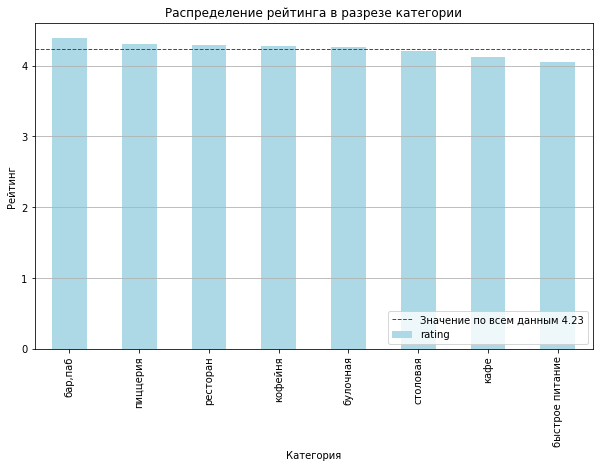

In [54]:
title = 'Распределение рейтинга в разрезе категории'
xlabel = 'Категория'
ylabel = 'Рейтинг'

plot_bar_plot (rest_df, 'category', 'rating', 'mean', title, ylabel, xlabel)

Значение среднего рейтинга в категории почти одинаковы и нет четкой зависимости от между категорией и рейтингом. Однако значение среднего рейтинга в барах несколько выше чем усредненное значение по всем заведениям, а в кафе и заведения быстрого питания ниже.

Повторим аналогичную процедуру в зависимости от округа.


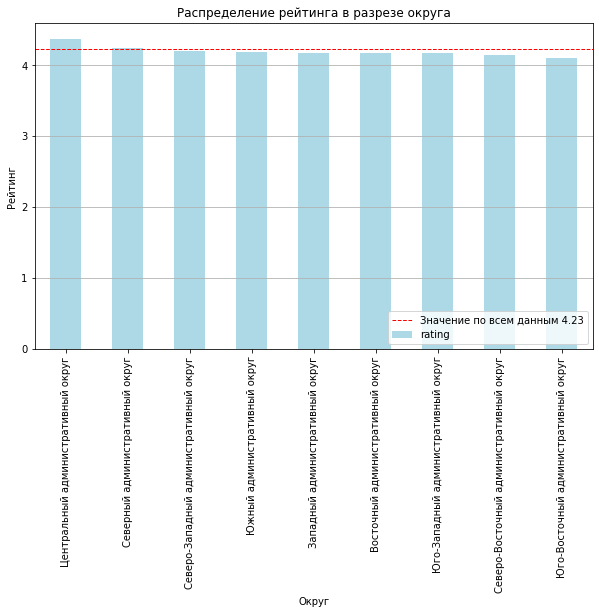

In [55]:
title = 'Распределение рейтинга в разрезе округа'
xlabel = 'Округ'
ylabel = 'Рейтинг'

plot_bar_plot (rest_df, 'district', 'rating', 'mean', title, ylabel, xlabel)

Так же как и с категориями, сложно говорить о том, что прослеживается какая-то зависимость. Однако, в центральном административном округе значение среднего рейтинга выше, чем в остальных округах. При этом, почти во всех округах (кроме Северного административного округа) значение среднего рейтинга заведений ниже чем средняя оценка всех заведений. Это говорит о том, что в среднем в центральном административном округе клиенты ставят более высокие оценки заведениям, чем в остальных.

### 3.7. Топ-15 популярных сетей в Москве: 

Следующем шагом выведем топ-15 популярных сетей в Москве. Для этого сформируем топ на основе количества заведений в рамках одной сети и выведим их средний рейтинг. Для этого воспользуемся столбчатой диаграммой.

In [56]:
# Создадим новый датафрейм, в котором будут только сетевые заведения 
rest_df_chain = rest_df[rest_df['chain']==1]
rest_df_chain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 4 to 8404
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3203 non-null   object 
 1   name               3203 non-null   object 
 2   category           3203 non-null   object 
 3   address            3203 non-null   object 
 4   district           3203 non-null   object 
 5   hours              3203 non-null   object 
 6   rating             3203 non-null   float32
 7   chain              3203 non-null   int8   
 8   seats              1925 non-null   float64
 9   price              1137 non-null   object 
 10  avg_bill           1465 non-null   object 
 11  middle_avg_bill    1186 non-null   float64
 12  middle_coffee_cup  263 non-null    float64
 13  is_24_7            3203 non-null   bool   
dtypes: bool(1), float32(1), float64(3), int8(1), object(8)
memory usage: 319.0+ KB


Теперь в данных остались только сетевые заведения.

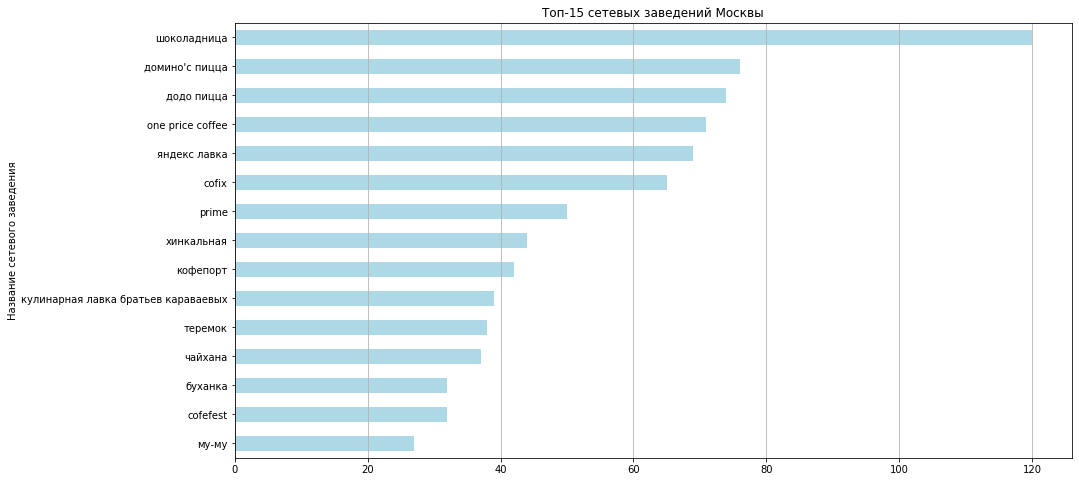

In [57]:
rest_df_chain_top = rest_df_chain.groupby('name').agg({'id' : 'count', 'rating' : 'mean'}).sort_values(by = 'id', ascending = False)
plt.figure(figsize = (15,8))
rest_df_chain_top.iloc[:15, 0].sort_values().plot(kind = 'barh',  title = 'Топ-15 сетевых заведений Москвы',
                  xlabel = 'Название сетевого заведения', color = 'lightblue')
plt.grid(axis = 'x')
plt.show()

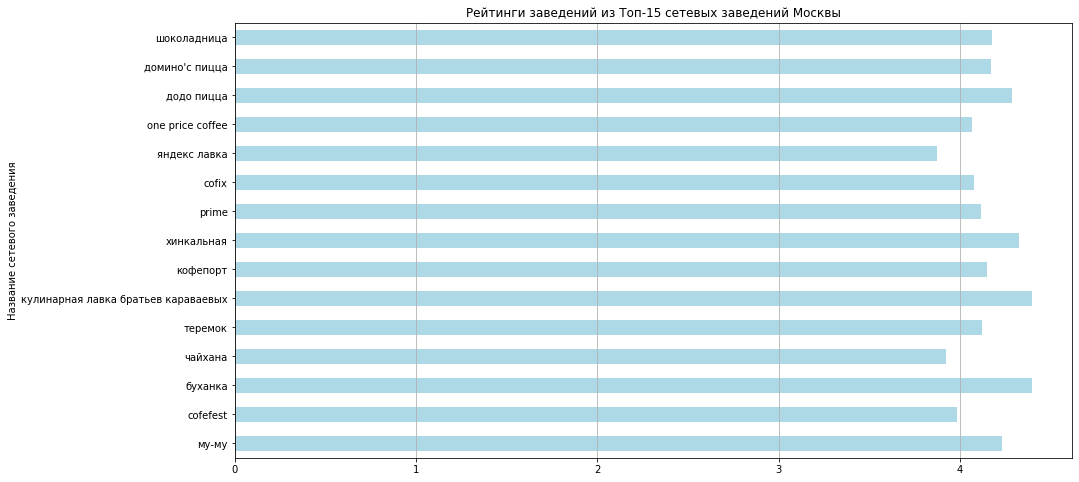

In [58]:
rest_df_chain_top.iloc[:15].sort_values(by = 'id').plot(kind = 'barh', y='rating', title = 'Рейтинги заведений из Топ-15 сетевых заведений Москвы',
                  ylabel = 'Рейтинг', xlabel = 'Название сетевого заведения', color = 'lightblue', legend = False, figsize = (15,8))
plt.grid(axis = 'x')
plt.show()

In [59]:
rest_df_chain_top.head(15)

,id,rating
name,,
шоколадница,120,4.177500
домино'с пицца,76,4.169737
додо пицца,74,4.286487
one price coffee,71,4.064789
яндекс лавка,69,3.872464
cofix,65,4.075385
prime,50,4.116000
хинкальная,44,4.322727
кофепорт,42,4.147619


В топ 15 вошли следующие сетевые заведения Москвы: Шоколадница, Домино`с пицца, Додо пицца, One Price Coffee, Яндекс лавка, Cofix, Prime, Хинкальная, Кофепорт, Кулинарная лавка братьев Караваевых, Теремок, чайхана, Cofefest, Бахунка и Му-му (список заведений расположен в порядке убывания популярности - количества заведений в сети). При этом самый высокий рейтинг среди указанных заведений демонстрирует заведения "Буханака" - 4,4 и Кулинарная лавка братьев Караваевых - 4,39. Самый никзкий рейтинг у Яндекс лавки - 3,87. 

### 3.8. Как удаленность от центра влияент на цены в заведениях?

Для того, чтобы узнать как удаленность от центра влияет на цены в заведениях необходимо выполнить два условия:
- сформировать новый датафрейм, в котором будут выбраны все заведения где присутствует значения по полю `middle_avg_bill`;
- построить гистограммы распределения значения цен и сопоставить их (для удобства сопоставления необходимо ввести новый столбец, который будет хранить значение-индикатор расположения кафе в центральном административном округе.

In [60]:
# Для начала сформируем новый датафрейм
rest_df_isna_avg = rest_df[rest_df['middle_avg_bill'].isna() == False]

#Также уберем выбросы в столбце, чтобы это не исказило будущие графики
Q1 = rest_df_isna_avg['middle_avg_bill'].quantile(0.25)
Q3 = rest_df_isna_avg['middle_avg_bill'].quantile(0.75)
IQR = Q3 - Q1
#Из-за большого разброса в ценах воспользуемся коэффициентом 3
rest_df_isna_avg = rest_df_isna_avg[(rest_df_isna_avg['middle_avg_bill'] >= Q1 - IQR * 3) &
                          (rest_df_isna_avg['middle_avg_bill'] <= Q3 + IQR * 3)]
# Теперь создадим новый столбец, для этого напишем функцию
def is_center (row):
    if row['district'] == 'Центральный административный округ':
        return 1
    else:
        return 0
# Вызовем функцию для каждой строки датафрейма
rest_df_isna_avg['center'] = rest_df_isna_avg.apply(is_center, axis = 1)

Теперь приступим к визуализации, дополнительное поле было создано для возможности сопоставить гистограммы.

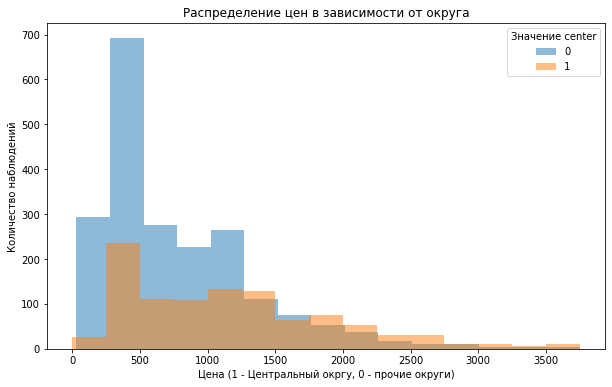

In [61]:
plt.figure(figsize = (10,6))
for i in rest_df_isna_avg['center'].unique():
    rest_df_isna_avg.loc[rest_df_isna_avg['center'] == i, 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = 15,
                                                             label = f'{i}',
                                                             legend = True)
plt.title('Распределение цен в зависимости от округа')
plt.xlabel('Цена (1 - Центральный окргу, 0 - прочие округи)')
plt.ylabel('Количество наблюдений')
plt.legend (title = 'Значение center')
plt.show()

Из этого графика видно, что значений для всех округов кроме центрального намного больше, поэтому добавим параметр `density`, тем самым заменив количество наблюдений на плотность вероятности. Также есть проблема в том, что гистограммы имеют разные промежутки и поэтому не получается наложить их друг на друга.

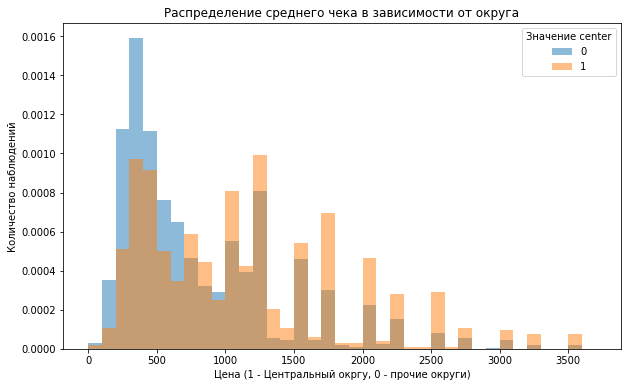

,mean,median
center,,
0,802.831731,600.0
1,1112.387873,1000.0


In [62]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
for i in rest_df_isna_avg['center'].unique():
    rest_df_isna_avg.loc[rest_df_isna_avg['center'] == i, 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100),
                                                             label = f'{i}',
                                                             legend = True,
                                                             density = True)
plt.title('Распределение среднего чека в зависимости от округа')
plt.xlabel('Цена (1 - Центральный окргу, 0 - прочие округи)')
plt.ylabel('Количество наблюдений')
plt.legend (title = 'Значение center')
plt.show()
display(rest_df_isna_avg.groupby('center')['middle_avg_bill'].agg(['mean','median']))

Из полученной гистограммы заметно, что распредение цен в центральном округе и в других неравномерно.Однако, прослеживается тенденция на уменьшение цены в зависимости от удаленности расположения заведения от центра. Так, в центральном административном округе, плотность распределения среднего чека свыше 700 почти всегда больше чем в других округах, при этом плотность распределения среднего чека до 700 больше в других округах. Говоря о плотности распределения мы подразумеваем частоту встречи наблюдений в отношении всех наблюдений в округе.

Также для оценки различий было подсчитано среднее значение и медиана в разбивке на центральный и остальные округи. В Центральном административном округе усредненное значение среднего чека составило 1112,4, а медиана - 1000. При этом в других округах усредненное значение составляет 802,8, медиана - 600. Таким образом, стоимость среднего чека в центральном округе выше чем в остальных округах.

Для удобства также выведем гистограмы распределения цен для всех округов по отдельности:
- Центральный административный округ;
- Северный административный округ;
- Северо-Восточный административный округ;
- Северо-Западный административный округ;
- Западный административный округ;
- Восточный административный округ;
- Юго-Восточный административный округ;
- Южный административный округ;
- Юго-Западный административный округ.

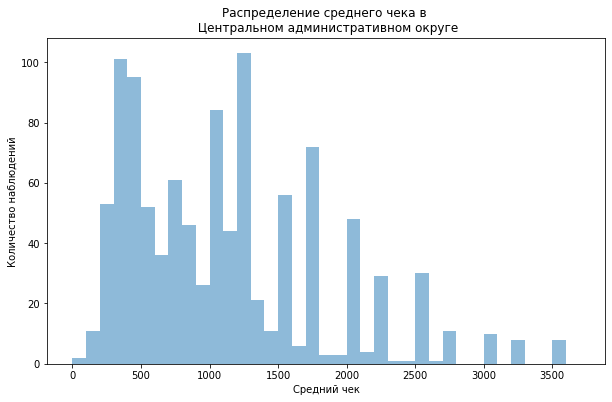

mean      1112.387873
median    1000.000000
Name: middle_avg_bill, dtype: float64

In [63]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Центральный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Центральном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Центральный административный округ','middle_avg_bill'].agg(['mean','median']))

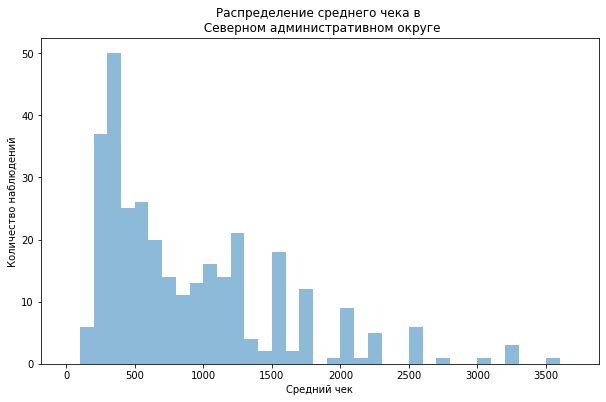

mean      873.206897
median    650.000000
Name: middle_avg_bill, dtype: float64

In [64]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Северном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северный административный округ','middle_avg_bill'].agg(['mean','median']))

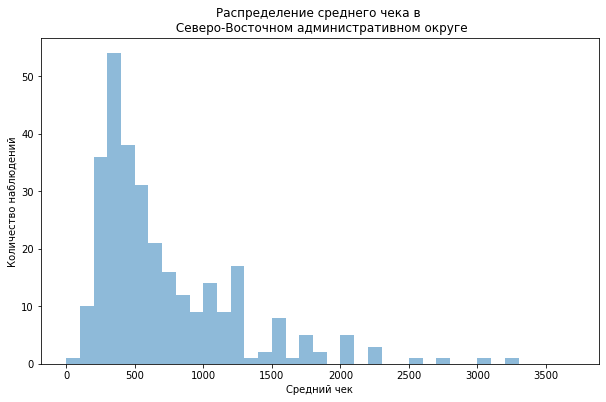

mean      704.0
median    500.0
Name: middle_avg_bill, dtype: float64

In [65]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северо-Восточный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Северо-Восточном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северо-Восточный административный округ','middle_avg_bill'].agg(['mean','median']))

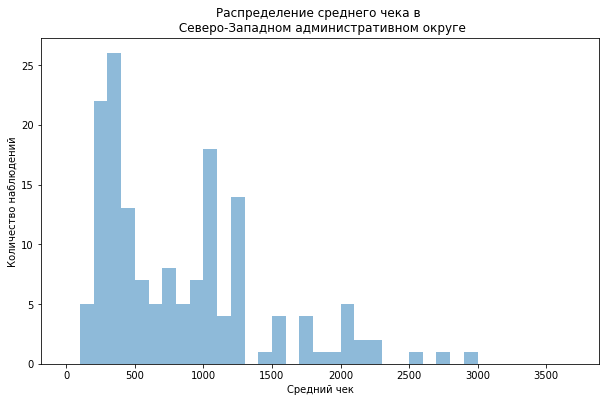

mean      822.22293
median    700.00000
Name: middle_avg_bill, dtype: float64

In [66]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северо-Западный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Северо-Западном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Северо-Западный административный округ','middle_avg_bill'].agg(['mean','median']))

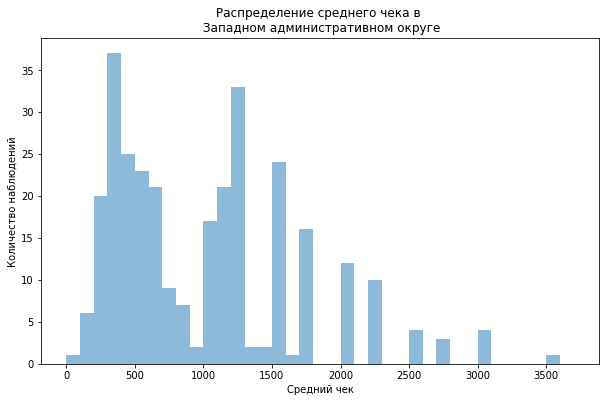

mean      1029.726974
median    1000.000000
Name: middle_avg_bill, dtype: float64

In [67]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Западный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Западном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Западный административный округ','middle_avg_bill'].agg(['mean','median']))

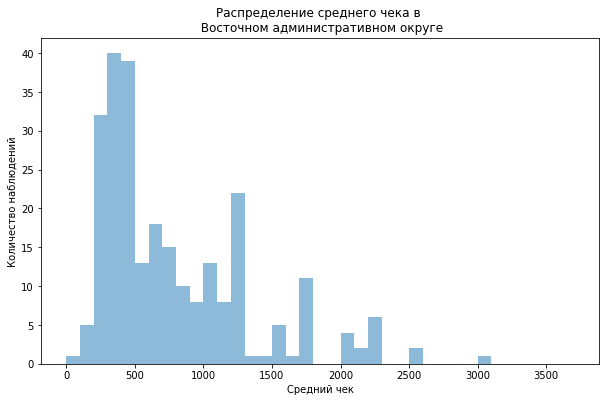

mean      766.910853
median    550.000000
Name: middle_avg_bill, dtype: float64

In [68]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Восточный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Восточном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Восточный административный округ','middle_avg_bill'].agg(['mean','median']))

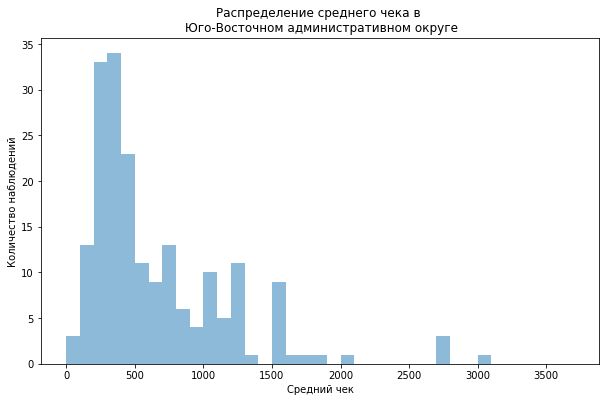

mean      654.097938
median    450.000000
Name: middle_avg_bill, dtype: float64

In [69]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Юго-Восточный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Юго-Восточном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Юго-Восточный административный округ','middle_avg_bill'].agg(['mean','median']))

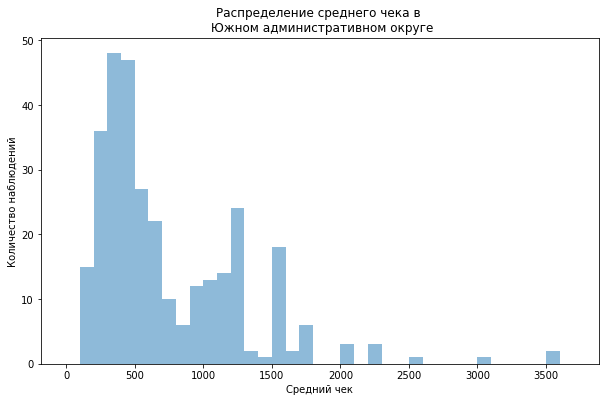

mean      725.242812
median    500.000000
Name: middle_avg_bill, dtype: float64

In [70]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Южный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Южном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Южный административный округ','middle_avg_bill'].agg(['mean','median']))

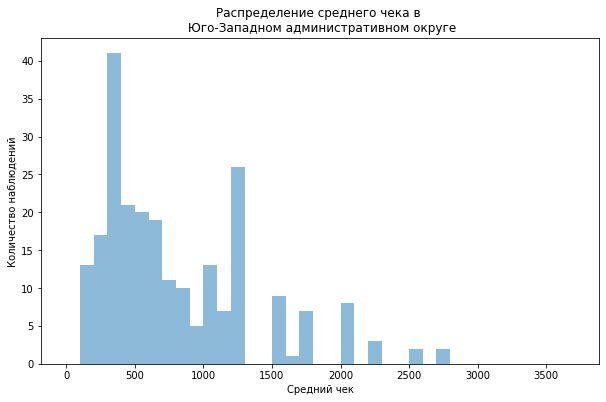

mean      792.561702
median    600.000000
Name: middle_avg_bill, dtype: float64

In [71]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Юго-Западный административный округ', 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100))
plt.title('Распределение среднего чека в \n Юго-Западном административном округе')
plt.xlabel('Средний чек')
plt.ylabel('Количество наблюдений')
plt.show()
display(rest_df_isna_avg.loc[rest_df_isna_avg['district'] == 'Юго-Западный административный округ','middle_avg_bill'].agg(['mean','median']))

Полученные гистограммы распределения демонстрируют:
- количество наблюдений в центральном административном округе намного больше, чем в остальных округах по отдельноти;
- основные значения среднего чека в центральном округе расположены в пределах от 100 до 2600, а в остальных от 100 до 1300 - 1700, что говорит об уменьшении размера среднего чека в зависимости от удаленности от центра.


In [72]:
# Выведем среднее значение чека и медиану среднего чека
rest_df_isna_avg.groupby('district')['middle_avg_bill'].agg(['mean','median']).sort_values(by='mean', ascending = False)

,mean,median
district,,
Центральный административный округ,1112.387873,1000.0
Западный административный округ,1029.726974,1000.0
Северный административный округ,873.206897,650.0
Северо-Западный административный округ,822.222930,700.0
Юго-Западный административный округ,792.561702,600.0
Восточный административный округ,766.910853,550.0
Южный административный округ,725.242812,500.0
Северо-Восточный административный округ,704.000000,500.0
Юго-Восточный административный округ,654.097938,450.0


Теперь помимо рассмотрения гистограмм распределения значений среднего чека можно также сразу вглянуть на усредненное значение среднего чека и медиану его значений в разрезе каждого округа. Заметно что на первом месте расположен центральный округ с самыми высокими значениями среднего, а на втором западный округ, у которого значение среднего меньше, однако медиана совпадает со значением медианы в центральном округе.

### 3.9. Проверка дополнительных взаимосвязей между данными.

Для проверки дополнительных взаимосвязей между данными вновь построим тепловую карту значений показателей корреляции между данными датафрейма исключив рейтинг, который был проанализирован выше.

In [73]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest_df[['category', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7']].phik_matrix()

# Выводим результаты
print('Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:') 
print(correlation_matrix)

interval columns not set, guessing: ['chain', 'seats', 'middle_avg_bill']
Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:
                 category  district     chain     seats  middle_avg_bill  \
category         1.000000  0.174584  0.266000  0.048923         0.053513   
district         0.174584  1.000000  0.064473  0.352440         0.056558   
chain            0.266000  0.064473  1.000000  0.056523         0.046206   
seats            0.048923  0.352440  0.056523  1.000000         0.045217   
middle_avg_bill  0.053513  0.056558  0.046206  0.045217         1.000000   
is_24_7          0.244815  0.076357  0.043488  0.043193         0.046124   

                  is_24_7  
category         0.244815  
district         0.076357  
chain            0.043488  
seats            0.043193  
middle_avg_bill  0.046124  
is_24_7          1.000000  


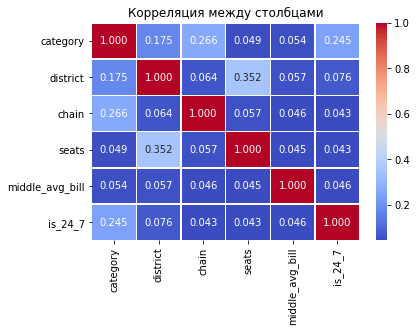

In [74]:
sns.heatmap(correlation_matrix, annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция между столбцами')
plt.show()

Также дополнительно построим матрицу показателей коррелции по датафрейму, в котором остались лишь записи с непустыми ячейками в столбце `middle_avg_bill`

In [75]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix_bill = rest_df_isna_avg[['category', 'district', 'chain', 'seats', 'middle_avg_bill', 'is_24_7']].phik_matrix()

# Выводим результаты
print('Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:') 
print(correlation_matrix_bill)

interval columns not set, guessing: ['chain', 'seats', 'middle_avg_bill']
Корреляционная матрица с коэффициентом phi_k для примерного датафрейма:
                 category  district     chain     seats  middle_avg_bill  \
category         1.000000  0.157825  0.228867  0.086984         0.443714   
district         0.157825  1.000000  0.037250  0.248617         0.197962   
chain            0.228867  0.037250  1.000000  0.086270         0.199013   
seats            0.086984  0.248617  0.086270  1.000000         0.110451   
middle_avg_bill  0.443714  0.197962  0.199013  0.110451         1.000000   
is_24_7          0.221045  0.075058  0.000000  0.068871         0.156520   

                  is_24_7  
category         0.221045  
district         0.075058  
chain            0.000000  
seats            0.068871  
middle_avg_bill  0.156520  
is_24_7          1.000000  


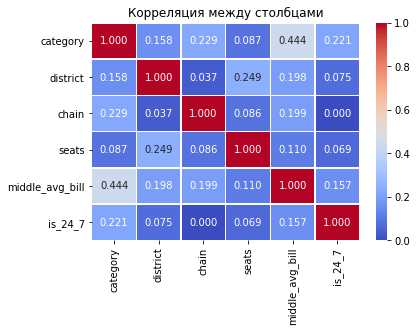

In [76]:
sns.heatmap(correlation_matrix_bill, annot = True, fmt = '.3f', linewidth = 0.5, cmap = 'coolwarm')
plt.title('Корреляция между столбцами')
plt.show()

На основе полученных данных выделим самые сильные показатели корреляции между значениями:
- По первой теплой карте:
    - Категория заведения коррелируется со значениями округа, формы и временем работы (слабые связи);
    - Округ коррелируется с количеством посадочных мест (средняя связь).
- По второй тепловой карте:
    - Категория коррелируется с формой (слабая связь) и размером среднего чека (средняя связь);
    - Округ коррелируется с количеством посадочних мест и размером среднего чека (слабая связь);
    - Форма коррелируется с размером среднего чека (слабая связь).

Проверим все перечисленные корреляции. Для проверки корреляций связанных с размером среднего чека будем пользоваться вторым датафреймом (заведения, у которых указан размер среднего чека).

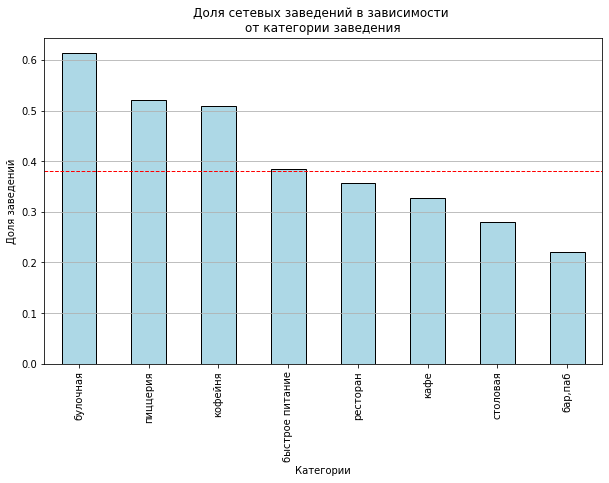

In [77]:
rest_df.groupby('category')['chain'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Доля сетевых заведений в зависимости \nот категории заведения',
                                                 xlabel = 'Категории', ylabel = 'Доля заведений',
                                                 figsize = (10,6),
                                                 color = 'lightblue', edgecolor = 'black')
mean_value_chain = rest_df['chain'].mean()
plt.axhline(mean_value_chain, color = 'red', linestyle ='--', linewidth = 1)
plt.grid(axis='y')
plt.show()

Количество сетевых заведений в составляет 38% от общего количества заведений. При этом, чаще всего сетевые заведения открываются в категориях бара, пиццерия и кофейня. Это говорит о том, что сетевые заведениях в данных категориях встречаются чаще, однако это нельзя назвать зависимостью.

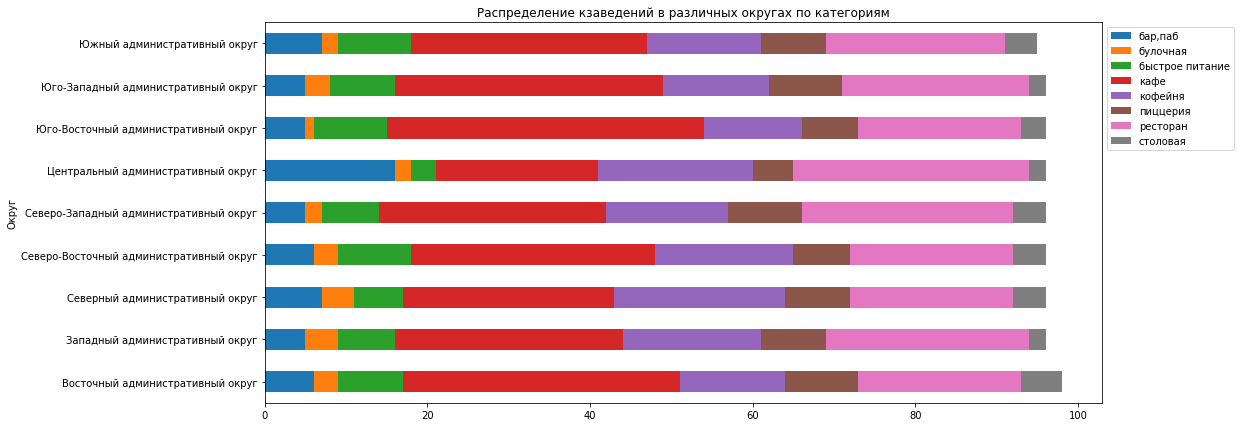

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Восточный административный округ,6,3,8,34,13,9,20,5
Западный административный округ,5,4,7,28,17,8,25,2
Северный административный округ,7,4,6,26,21,8,20,4
Северо-Восточный административный округ,6,3,9,30,17,7,20,4
Северо-Западный административный округ,5,2,7,28,15,9,26,4
Центральный административный округ,16,2,3,20,19,5,29,2
Юго-Восточный административный округ,5,1,9,39,12,7,20,3
Юго-Западный административный округ,5,3,8,33,13,9,23,2
Южный административный округ,7,2,9,29,14,8,22,4


In [78]:
pivot_table = pd.pivot_table(rest_df, index = 'district', columns =  ['category'], values = 'id', aggfunc = 'count', margins = True)
pivot_table.drop('All', inplace = True)
for i in pivot_table.columns:
    for j in pivot_table.index:
        pivot_table[i][j] = round((pivot_table[i][j] / pivot_table['All'][j]) * 100,2)
pivot_table.drop(columns = 'All', inplace = True)
pivot_table.plot(kind = 'barh', stacked = True, figsize=(15,7), xlabel = 'Округ', title = 'Распределение кзаведений в различных округах по категориям')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()
display(pivot_table)

Из полученной столбчатой диаграммы видно процентное соотношение заведений различных категорий в разбивке по округам. В центральном административном округе процент баров и ресторанов выше чем в других округах. При этом процент заведений быстрого питания, кафе и пиццерий ниже. Таким образом, можно также проследить некую зависимость в популярности заведений определенной категории в центральном округе.

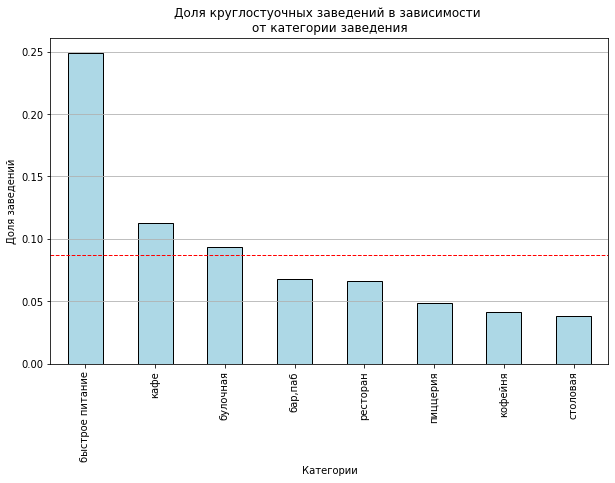

In [79]:
rest_df.groupby('category')['is_24_7'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Доля круглостуочных заведений в зависимости \nот категории заведения',
                                                 xlabel = 'Категории', ylabel = 'Доля заведений',
                                                 figsize = (10,6),
                                                 color = 'lightblue', edgecolor = 'black')
mean_value_24_7 = rest_df['is_24_7'].mean()
plt.axhline(mean_value_24_7, color = 'red', linestyle ='--', linewidth = 1)
plt.grid(axis='y')
plt.show()

Доля круглосуточных заведений в целом составляет 9%. Однако, распредление круглостуочных заведений по категориям демонстрирует, что больше всго они встречаются именно в заведениях быстрого питания. 

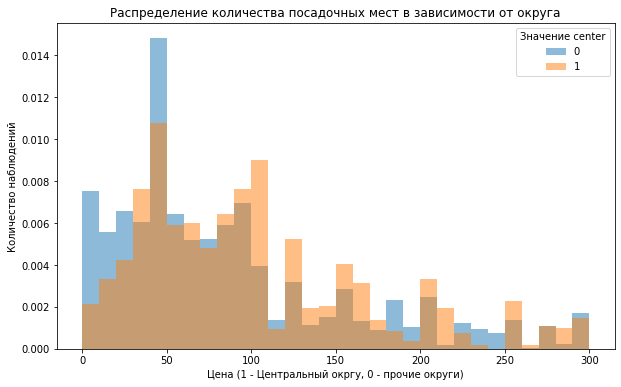

In [80]:
plt.figure(figsize = (10,6))
rest_df_seats = rest_df[rest_df['seats'].isna() == False]
rest_df_seats = rest_df_seats[rest_df_seats['seats'] <= 300]
rest_df_seats['center'] = rest_df_seats.apply(is_center, axis = 1)
min_value = rest_df_seats['seats'].min()
max_value = rest_df_seats['seats'].max()
for i in rest_df_seats['center'].unique():
    rest_df_seats.loc[rest_df_seats['center'] == i, 'seats'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 10),
                                                             label = f'{i}',
                                                             legend = True,
                                                             density = True)
plt.title('Распределение количества посадочных мест в зависимости от округа')
plt.xlabel('Цена (1 - Центральный окргу, 0 - прочие округи)')
plt.ylabel('Количество наблюдений')
plt.legend (title = 'Значение center')
plt.show()

Рапсределение посадочных мест в зависимости от округов неравномерны. Большинство заведений центрального округа имеют от 10 до 160 мест.В других округах количество посадочных мест чаще всего варируется от 0 до 130. Однако, строгой зависимости здесь не наблюдается. Данные распределены неравномерно, однако чаще всего встречаются заведени с количеством мест от 40 до 50. 

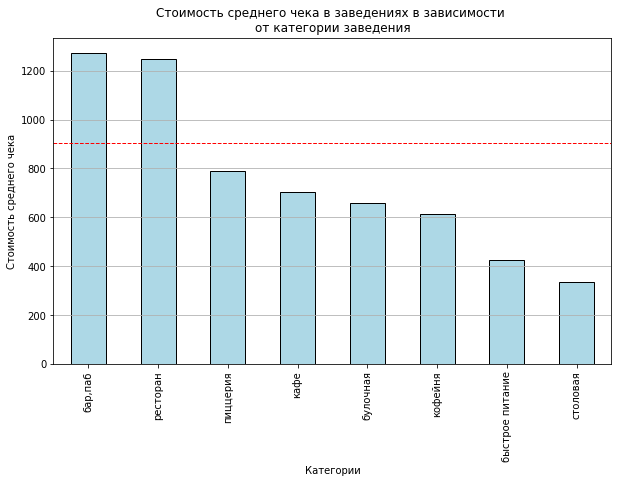

,mean,median
category,,
"бар,паб",1271.738372,1250.0
ресторан,1249.849558,1250.0
пиццерия,789.377215,600.0
кафе,702.281385,550.0
булочная,658.773585,450.0
кофейня,614.210000,400.0
быстрое питание,424.347458,375.0
столовая,335.348066,300.0


In [81]:
rest_df_isna_avg.groupby('category')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Стоимость среднего чека в заведениях в зависимости \nот категории заведения',
                                                 xlabel = 'Категории', ylabel = 'Стоимость среднего чека',
                                                 figsize = (10,6),
                                                 color = 'lightblue', edgecolor = 'black')
mean_value_avg = rest_df_isna_avg['middle_avg_bill'].mean()
plt.axhline(mean_value_avg, color = 'red', linestyle ='--', linewidth = 1)
plt.grid(axis='y')
plt.show()
display(rest_df_isna_avg.groupby('category')['middle_avg_bill'].agg(['mean','median']).sort_values(by='mean',ascending=False))

Стоимость среднего чека составляет почти 900. При этом, в барах и ресторан значения превышают 1200, в остальных категориях аведений средний чек ниже 800. 

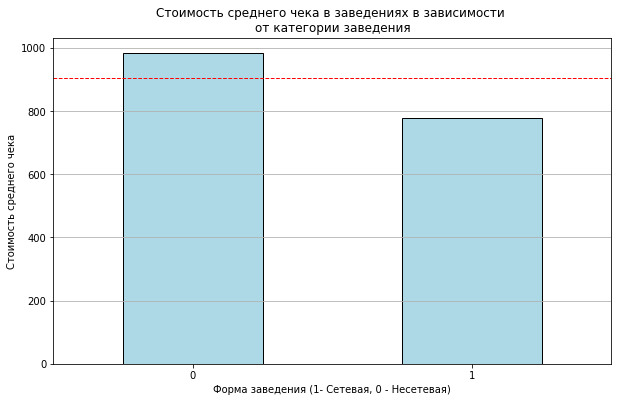

In [82]:
rest_df_isna_avg.groupby('chain')['middle_avg_bill'].mean().sort_values(ascending=False).plot(kind = 'bar', title = 'Стоимость среднего чека в заведениях в зависимости \nот категории заведения',
                                                 xlabel = 'Форма заведения (1- Сетевая, 0 - Несетевая)', ylabel = 'Стоимость среднего чека',
                                                 figsize = (10,6), rot = 0,
                                                 color = 'lightblue', edgecolor = 'black')
mean_value_avg = rest_df_isna_avg['middle_avg_bill'].mean()
plt.axhline(mean_value_avg, color = 'red', linestyle ='--', linewidth = 1)
plt.grid(axis='y')
plt.show()

В сетевых заведениях стоимость среднего чека ниже 800, а в несетевых почти 1000. Также рассмотрим распределение стоимости среднего чека на гистограмме.

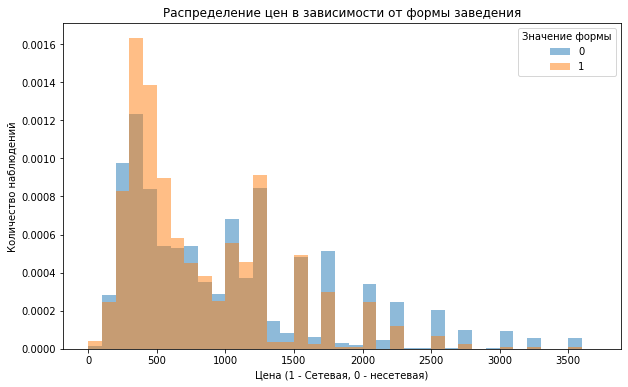

In [83]:
plt.figure(figsize = (10,6))
min_value = rest_df_isna_avg['middle_avg_bill'].min()
max_value = rest_df_isna_avg['middle_avg_bill'].max()
for i in rest_df_isna_avg['chain'].unique():
    rest_df_isna_avg.loc[rest_df_isna_avg['chain'] == i, 'middle_avg_bill'].plot(kind = 'hist',
                                                             alpha = 0.5,
                                                             bins = range(int(min_value), int(max_value+1), 100),
                                                             label = f'{i}',
                                                             legend = True,
                                                             density = True)
plt.title('Распределение цен в зависимости от формы заведения')
plt.xlabel('Цена (1 - Сетевая, 0 - несетевая)')
plt.ylabel('Количество наблюдений')
plt.legend (title = 'Значение формы')
plt.show()

Полученные гистограммы демонстрирует неравномерное распределение с удлиненным правыми хвостами. Это говорит о том, что среднее значение больше медианного и подвержено выбросам. В сетевых заведениях значенияя стомости среднего чека находятся в пределах от 100 до 2100. Гистограмма стоимости среднего чека в сетевых заведения имеет более длинный правый хвост по сравнению с несетевыми. Доля наблюдений в сетевых заведениях в диапозоне от 100 до 1300 в большинстве случаев больше, при этом от 1300 несетевые заведения демонстрируют больше наблюдений. Что подтверждает небольшое смещение графика и более высокую среднюю стоимость среднего чека в несетевых заведениях.

### Промежуточный вывод по разделу:

В ходе работы в разделе был проведен исследовательский анализ данных содержащий следующие вопросы и задачи:
- Какие категории заведений представлены в данных? 
- Каких заведений больше - сетевых или несетевых? 
- Встречаются ли в данных аномальные значения или выбросы? 
- Сильно ли различаются усредненные рейтинги для разных типов общепита?
- С каким данными показывают самую сильную корреляцию рейтинге заведений? 
- Определен Топ-15 популярных сетей в Москве.
- Как удаленность от центра влияет на цены в заведениях? 
- Проведена дополнительная проверка взаимосвязей между данными. 

<a class="anchor" id="4_charter"></a> 
## 4.Итоговый вывод и рекомендации

### Итоговый вывод по проделанной работе:

В ходе работы с данными проведено ознакомление с данными и совершена их предобработка. Были обработаны два датафрейма общий размер которых составил 13 столбцов и 8046 строк. Пропуски в данных не заполнялись так как могли исказаить общую картину данных ввиду их большого количества. Также из данных были удалены дубликаты (4 записи) и добавлены новые столбцы для удобства анализа, которые были заполнены значениями-индикаторами. 

В ходе исследования проанализировали данные 8402 заведений общественного питания в Москве. Данные включали название заведния и его категорию, расположение и рейтинг, время работы, форму заведения, а также информацию о стоимости среднего чека. Акцент исследования был на том, чтобы найти взаимосвязи между рейтингом заведения и стомостью среднего чека, расположением, категорией и формой заведения. такж проведена проверка на меньшом объеме данных (3146 значений, в которых присутствует стоимость среднего чека) по всем данным на поиск дополнительных взаимосвязей. А полученных результатах будет сказано ниже.

### Ответы на исследовательские вопросы:

В ходе исследовательского анализ данных даны ответы на следующие вопросы и решены задачи заказчика:
- Какие категории заведений представлены в данных? В данных содержится информация о 8042 заведениях общественного питания Москвы, которые разделены на **8 категорий** (реосторан, бар(паб), кафе, кофейня, пиццерия, быстрое питание, столовая, булочная). При изучении распределения заведений по категориям заметно что **кафе и рестоораны** представляют болшую часть данных (суммарно 4418 заведений). Больше всего кафе - 2376 заведений, меньше всего - булочных (256 заведений).
- Какие административные районы Москвы присутствуют в данных? В датафрйеме есть информация о 9 административных округах Москвы (Центральный, Северный, Северо-Западный, Северо-Восточный, Южный, Юго-Западный, Юго-Восточный, Западный, Восточный). В центральном районе расположенно больше всего заведений (2242 заведения) в северо-западном меньше всего (409 заведений). При этом в остальных округах значения варируется от 709 до 898 заведений. Так как количество заведений в центральном районе составляет почти четверть от всех заведений, то было рассмотерно распределение заведений по категориям в этом районе. Больше всего в центральном округе ресторанов (670 заведений), меньше всего - заведений быстрого питания, столовых и булочных (меньше 100 заведений в каждой категории).
- Каких заведений больше - сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Сетевых заведений почти в 1,5 меньше чем несетевых (**38% и 62% соответсвенно**). Доля сетевых заведений больше всего в булочных, пиццериях и кофейнях, а меньше всего в барах. Это говорит о большей уникальности заведений в разрезе категории.
- Встречаются ли в данных аномальные значения или выбросы? Анализ показал что основными проблемными точками  сточки зрения аномалий и выбросов являются столбцы `seats`, `middle_avg_bill` и `middle_coffee_cup`. Причины появления аномальных значений и выбросов в столбце количества посадочных мест возможно из-за ошибок при внесении данных пользователями. В свою очередь в полях о стоимости среднего чека ошибки могут возникнуть из-за поля `avg_bill`, которое также заполняется пользователями и в последствии обрабатывается для заполнения перечисленных ранее стобцов. в ходе анализа наиболее типичного количества посадочных мест были получены результаты распределения посадочных мест в различных категориях заведений. Во всех случаях среднее количество больше чем медиана, что говорит о выбросах во всех категориях. Однако, в целом, самое типчное количество мест **от 25 до 150  для всех категорий**.
- Сильно ли различаются усредненные рейтинги для разных типов общепита? В ходе анализа выявленно, что усредненный **рейтинг заведений в разбивке по категориям почти одинаков**. Все заведени я имеют рейтинг выше 4. Однако, больше всего **рейтинг в барах - 4.39, в заведениях быстрого питания - 4.05**.
- С каким данными показывают самую сильную корреляцию рейтинге заведений? Значение рейтинга показывают самую ильную корреляцию с значением стоимости среднего чека, категорией заведения и его расположением, однако учитывая значения корреляция связи слабые. При проверки зависимости рейтинга от среднего чека было определено, что **основное скопление данных расположено в промежутке от 200 до 1500 по среднему чеку и от 4 до 4.5 по рейтингу**. При этом зависимость на графике совместного распределения не прослеживается, они распределены равномерно (**анализ проводился на основе 3146 записей**, в которых содержится информация о цене). Распределение рейтинга в зависимости от категории и расположения также не демонстрирует какой-то зависимости, но заметно что в барах и в центральном округе усредненное значение рейтинга заведений выше, чем в других категориях и округах (стоит также проверить содержание баров в центральном округе, возмонжо именно это влияет на рейтинг).
- Определен Топ-15 популярных сетей в Москве (по количеству заведений в сети). **В топ 15 вошли следующие сетевые заведения: Шоколадница, Домино`с пицца, Додо пицца, One Price Coffee, Яндекс лавка, Cofix, Prime, Хинкальная, Кофепорт, Кулинарная лавка братьев Караваевых, Теремок, чайхана, Cofefest, Бахунка и Му-му** (список заведений расположен в порядке убывания популярности - количества заведений в сети). При этом самый высокий рейтинг демонстрирует сетевые заведения "Буханка" и "Кулинарная лавка братьев Караваевых", самый низкий - Яндекс Лавка.
- Как удаленность от центра влияет на цены в заведениях? На основе анализа построенной в ходе работы гистограммы рапсределения стоимости среднего чека в зависимости от района, заметно что распределение цен в центральном округе по сравнению с другими имеет более вытянутый правый хвост. Оба распределения неравномерны. **При этом основное скопление наблюдений в центральном окргуе расположено в промежутке от 200 до 2600, а в других районах от 100 до 1600.** Учитывая наличие правого вытянутого хвоста значения средней стоимости среднего чека искажены выбросами, поэтому стоит анализировать медианы. Медианное значение среднего чека в центральном округе выше чем в остальных. Таким образом **в центральном округе средний чек зачастую больше чем в других**, что говорит о наличие слабой зависимости.
- Проведена дополнительная проверка взаимосвязей между данными. на основе рассчета значений коэффициента корреляций были построены две тепловые карты (по двум датафреймам: изначальному и датафрейму с записями, где заполнены все значения стоимости среднего чека). По первой теплой карте: Категория заведения коррелируется со значениями округа, формы и временем работы (слабые связи); Округ коррелируется с количеством посадочных мест (средняя связь). По второй тепловой карте: Категория коррелируется с формой (слабая связь) и размером среднего чека (средняя связь); Округ коррелируется с количеством посадочних мест и размером среднего чека (слабая связь); Форма коррелируется с размером среднего чека (слабая связь). Было построенно распределение доли содержания заведений различных категорий в различных районых. В центральном районе представлено большая доля баров и ресторанов по сравнению с другими районами, однако в других районах чаще встречаются заведения быстрого питания, кафе и столовые. Можно выдвинуть гипотезу о том, что количество заведений категории бар, у которой значение среднего рейтинга выше чем в других категориях влияет на большое значение среднего рейтинга в центральном районе. При проверки зависимости категории заведения и круглосуточной работы стало заметно, что доля круглосуточных заведений намного больше среднего значения в категории заведений быстрого питания, почти четверть заведений из этой категории круглосуточны. Проверка зависимости количества посадочных мест от районе не демонстрирует строгую зависимость, однако сформированная гистограмма распределения демонстрирует, что распределения неравномерны и имеют большой правый хвост, тем самым лучше анализировать медианные значения. Большинство заведений центрального округа имеют от 10 до 160 мест.В других округах количество посадочных мест чаще всего варируется от 0 до 130.  Однако, чаще всего встречаются заведени с количеством мест от 40 до 50. Стоимость среднего чека в заведениях в зависимсоти от категорий показывает, что в барах и ресторанах значение на 300+ больше чем усредненное значение среднего чека по всем заведениям, что также вероятнее всего влияет на распределение стоимости среднего чека в зависимости от округа. Стоимость среднего чека в завиисомти от формы отличается не сильно: в сетевых средний чек чуть ниже 800, а в несетевых почти 1000. Учитывая, что несетевыми чаще всего являются бары, это зависимость также подверждает гипотезу о том, что в барах и ресторанах стоимость среднего чека выше и рапределения стоимости среднего чека в зависимости от района также коррелируется с этим. 

### Рекомендации для заказчика:


Рекомендую сделать упор на открытии завдения из **категории бар(паб)**, так как **средний рейтинг данной категории составляет 4.39**, что является **самым высоким** среди других категорий заведений.  
Также, в барах **стоимость среднего чека** в среднем выше и составляет **1272 рубля**, а **медиана - 1250 рублей.**

Больше всего **баров** расположено **в центральном округе 16% заведений от общего количества заведений районе**. Пусть в центральном районе и демонстрируется более высокие значения по рейтингу и стоимости среднего чека, **это не оказывает сильного влияния на показатели заведний типа бар**. 

Подтвердим эту информацию дополнительно на основе данных о усреднненой стоимости среднего чека.

In [84]:
rest_df_bar = rest_df_isna_avg[rest_df_isna_avg['category'] == 'бар,паб']
display(rest_df_bar.groupby('center')['middle_avg_bill'].agg(['mean','median']))

,mean,median
center,,
0,1144.188571,1100.0
1,1403.816568,1250.0


Индекс `center` отвечает за расположение заведений 1 - в центральном округе, 0 - в другом.  
Действительно между округами присутсвует разницы в среднем значении и медиане. **В округах усредненный чек и медиана меньше и равны  1144,2 и 1100 соответствено.** Однако, **главным преимуществом расположения в других округах является меньшая конкуренция**. В **центральном районе** представлено 364 из 764 по всей Москве (**почти 48% от всех баров**). Таким образом на данном рынке возникает большая конкуренция и как следствие ценовой разброс: в попытках приманить новых клиентов в маленькие заведения понижают цены.  
Лучше всего выбрать **районы с меньшим содержанием баров в общей массе заведений**.  
К ним относятся: **Западный , Юго-Восточный и Юго-Западные административные округи - 5% баров в общем количестве заведений в районе**.
Самым  лучшим вариантом будет **Западный адимнистративныф округ**, в котором значение усредненой **стоимости среднего чека составляет 1029,7 а медиана равна 1000**. Район **занимает 2-е место** по стоимости среднего чека, **сразу полсе центарльного округа**.

Главным условием открытия является несетевая форма и не круглосуточная работа.  
В **несетевых заведениях стоимость среднего чека** выше, чем в сетевых - **почти 1000**.  
Доля **круглосуточных баров** весьма мала - 0.07(**7% заведений**), однако это может привести к уменьшению рейтинга заведения.
Дополнительно проверим для эти данные для баров.

In [85]:
# Дополнительно проверим данные в разрезе сетевых и несетевых заведений и круглосуточных заведений.
display(rest_df_bar.groupby('chain')['middle_avg_bill'].agg(['mean','median']))
display(rest_df_bar.groupby('is_24_7')['rating'].agg(['mean','median']))


,mean,median
chain,,
0,1347.976285,1250.0
1,1059.780220,1060.0


,mean,median
is_24_7,,
False,4.396308,4.4
True,4.310526,4.3


Индекс `chain` отвечает за форму 1 - сетевая, 0 - несетевая.  
В **несетевых барах** усредненное значение **среднего чека составляет 1348, медиана - 1250**. В сетевых - меньше.

Индекс `is_24_07` отвечает за время работы (круглосуточно и не круглосуточно): 1 - круглосуточное, 0 - не круглосуточно.  
В круглосуточных барах усредненное значение рейтинга ниже и составляет 4.31 (**4.39 у не круглосуточных**).